# Predicting Game Price

In [2]:
#importing neceesary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#importing training dataset
training_dataset=pd.read_csv('steam_train.csv')


In [3]:
#training_dataset
training_dataset.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,708830,The Armament Project,2017-09-28,1,DysTop,DysTop,windows,0,Single-player;Partial Controller Support,Action;Indie,Action;Indie;Space,0,2,2,0,0,0-20000,2.89
1,538000,Hop Step Sing! Kisekiteki Shining! (HQ Edition),2017-06-29,1,Kodansha;Polygon Pictures Inc.;Lantis,Degica,windows,0,Single-player;Partial Controller Support,Casual,Casual;VR;Anime,0,30,4,0,0,0-20000,3.99
2,603530,A Robot Named Fight!,2017-09-07,1,Matt Bitner Games,Matt Bitner Games,windows;mac;linux,0,Single-player;Local Co-op;Shared/Split Screen;...,Violent;Gore;Action;Indie,Action;Metroidvania;Indie,60,271,30,279,279,20000-50000,10.29
3,564040,ZANGEKI WARP,2017-02-15,1,ASTRO PORT,Nyu Media,windows;linux,0,Single-player;Steam Achievements;Steam Trading...,Action;Indie,Action;Indie;Shoot 'Em Up,53,16,0,0,0,0-20000,4.79
4,951940,Almost There: The Platformer,2019-02-19,1,Bony Yousuf,The Quantum Astrophysicists Guild,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Casual;Indie;Strategy,Indie;Action;Casual,24,29,1,0,0,0-20000,7.19
5,489080,Spellforge,2016-10-04,1,Paper Scorpion Co.,Paper Scorpion Co.,windows,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie;RPG,Indie;Casual;RPG,87,3,2,0,0,0-20000,4.99
6,22650,Alien Breed 2: Assault,2010-09-22,1,Team17 Digital Ltd,Team17 Digital Ltd,windows,0,Single-player;Co-op;Steam Achievements;Partial...,Action,Action;Shooter;Isometric,13,478,226,96,96,200000-500000,6.99
7,771500,The Intern,2018-02-15,1,Red13Indie,Red13Indie,windows,0,Single-player;Partial Controller Support,Action;Adventure;Casual;Indie;RPG;Simulation;E...,Early Access;Adventure;Indie,0,10,9,0,0,0-20000,1.69
8,603360,CryptoMoneya,2017-09-03,1,azimut team,azimut team,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Casual;Indie,Indie;Casual,69,43,36,424,424,100000-200000,0.79
9,949700,Waifu Bay Girls,2018-11-02,1,Night Dreams Studio,Night Dreams Studio,windows;mac,0,Single-player,Casual;Indie,Casual;Nudity;Sexual Content,24,4,8,0,0,0-20000,2.09


In [4]:
#description of training dataset
training_dataset.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.504400e+04,25044.000000,25044.000000,25044.000000,2.504400e+04,25044.000000,25044.000000,25044.000000,25044.000000
mean,5.959530e+05,0.981113,0.355574,45.303865,1.004463e+03,215.739818,146.385202,139.477599,6.055217
std,2.514216e+05,0.136128,2.408379,350.998233,1.956267e+04,4447.824914,1783.038628,2114.615241,7.284552
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.014875e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.690000
50%,5.988250e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.000000,3.990000
75%,7.987450e+05,1.000000,0.000000,23.000000,1.240000e+02,41.000000,0.000000,0.000000,7.190000
max,1.069460e+06,1.000000,18.000000,5394.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,209.990000


In [5]:
training_dataset.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [6]:
training_dataset.shape

(25044, 18)

# VISUALIZING TRAINING SET

In [7]:
training_dataset.english.value_counts()  #1-98.111%

1    24571
0      473
Name: english, dtype: int64

In [7]:
training_dataset.name.value_counts()

Dark Matter                                           3
Slice&Dice                                            2
The Mine                                              2
RUSH                                                  2
Zombie Apocalypse                                     2
                                                     ..
The House in Fata Morgana: A Requiem for Innocence    1
Birth of a Hunter                                     1
FIM Speedway Grand Prix 15                            1
Astrox: Hostile Space Excavation                      1
The Cellar                                            1
Name: name, Length: 25008, dtype: int64

In [10]:
training_dataset.developer.value_counts().head(20) 

Choice of Games               89
KOEI TECMO GAMES CO., LTD.    64
Ripknot Systems               58
Laush Dmitriy Sergeevich      48
RewindApp                     42
Nikita "Ghost_RUS"            41
Dexion Games                  40
Hosted Games                  39
Blender Games                 36
Humongous Entertainment       32
For Kids                      32
EnsenaSoft                    32
HeR Interactive               30
Warfare Studios               30
Eipix Entertainment           28
Creobit                       28
Nekyau Games                  26
Sly                           26
Valve                         25
ERS G Studios                 25
Name: developer, dtype: int64

In [11]:
training_dataset.publisher.value_counts().head(20)  

Big Fish Games                197
Strategy First                125
Ubisoft                       102
Square Enix                    93
THQ Nordic                     93
Choice of Games                89
Sekai Project                  89
1C Entertainment               82
Dagestan Technology            82
SEGA                           74
Degica                         72
Plug In Digital                69
Slitherine Ltd.                68
AGM PLAYISM                    65
KOEI TECMO GAMES CO., LTD.     65
KISS ltd                       63
Atriagames                     62
Devolver Digital               59
Artifex Mundi                  58
Ripknot Systems                58
Name: publisher, dtype: int64

In [10]:
training_dataset.required_age.value_counts() #0-97.792% 

0     24491
18      286
16      178
12       66
7        12
3        11
Name: required_age, dtype: int64

In [28]:
training_dataset.categories.value_counts().head(7)  

Single-player                                                       5646
Single-player;Steam Achievements                                    2176
Single-player;Steam Achievements;Steam Trading Cards                 772
Single-player;Partial Controller Support                             735
Single-player;Steam Trading Cards                                    730
Single-player;Steam Achievements;Steam Cloud                         614
Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud     591
Name: categories, dtype: int64

In [45]:
training_dataset.genres.value_counts().head(8)  

Action;Indie              1695
Casual;Indie              1386
Action;Adventure;Indie    1132
Adventure;Indie           1068
Action;Casual;Indie        908
Action                     782
Adventure;Casual;Indie     739
Indie                      711
Name: genres, dtype: int64

In [50]:
training_dataset.steamspy_tags.value_counts().head(10) 

Action;Indie;Casual               764
Action;Adventure;Indie            650
Early Access;Action;Indie         473
Adventure;Indie;Casual            414
Indie;Casual                      354
Action;Indie;Adventure            294
Action;Indie                      267
Adventure;Casual;Hidden Object    227
Indie;Casual;Puzzle               224
Indie;Casual;Simulation           208
Name: steamspy_tags, dtype: int64

In [55]:
training_dataset.price.value_counts().tail(10)

7.59      1
1.19      1
18.90     1
49.90     1
7.18      1
13.37     1
0.49      1
95.99     1
2.36      1
209.99    1
Name: price, dtype: int64

In [56]:
training_dataset.owners.value_counts()

0-20000                17237
20000-50000             2820
50000-100000            1551
100000-200000           1275
200000-500000           1175
500000-1000000           474
1000000-2000000          267
2000000-5000000          177
5000000-10000000          42
10000000-20000000         20
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

# FEATURE ENGINEERING-CREATING OUR OWN FEATURES

In [28]:
platforms=training_dataset['platforms'].unique()

In [29]:
platforms

array(['windows', 'windows;mac;linux', 'windows;linux', 'windows;mac',
       'mac', 'mac;linux', 'linux'], dtype=object)

In [139]:
windows=[]
mac=[]
linux=[]
platforms=['windows','mac','linux']
for i in range(training_dataset.shape[0]):
    name=training_dataset['platforms'][i]
    print(name)
    arr=name.split(';')
    a=[]
    for p in platforms:
        if p in arr:
            a.append(1)
        else:
            a.append(0)
    windows.append(a[0])
    mac.append(a[1])
    linux.append(a[2])

windows
windows
windows;mac;linux
windows;linux
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac
windows;mac
windows
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows;mac
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;linux
windows;mac;linux
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac;li

windows
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac
windows;mac;linux
windows;mac;linux
windows
windows
windows;mac
windows
windows;mac
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac
windows;mac
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;linux
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux


windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac
windows;mac
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows;linux
windows;mac;linux
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows;linux
windows
windows;mac
windows;mac
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows


windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;linux
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;li

windows;mac
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;linux
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac
windows
windows
windows;mac
windows;mac
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows;mac;linux
windows;linux
windows;mac;linux
windows;linux
windows;mac
windows;mac
windows;linux
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
wi

windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows;mac
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;

windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;linux
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows;linux
windows
windows;linux
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows;linux
windows
windows
windows
windows;mac;linux
wind

windows
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;linux
windows;mac
windows
windows
windows;mac;linux
windows;mac
windows
windows;linux
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;linux
windows
windows;mac;linux
windows
wi

windows;mac;linux
windows;mac;linux
windows
windows
windows;mac
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows;mac
windows;linux
windows
windows
windows;mac;linux
windows;mac
windows
windows;mac
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows;linux
windows
windows;linux
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows
windows
wi

windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;linux
windows;mac
windows
windows;mac
windows;mac
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows;linux
windows
windows
windows;mac
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
window

windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows;linux
windows
windows;linux
windows;mac;linux
windows;mac;linux
windows
windows;mac
windows;linux
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
wi

windows;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac
windows;mac
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac
windows;mac
windows;linux
windows
windows
windows
windows
windows
windows
window

windows;mac;linux
windows
windows;mac;linux
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows;linux
windows;mac;linux
windows;mac;linux
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows;linux
windows
windows;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
wind

windows;mac;linux
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows;mac
windows
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows;mac
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows;mac
windows;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows;mac
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows


windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac
windows;mac;linux
windows;mac
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;linux
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
window

windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;linux
windows;mac
windows;mac
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows;mac
windows;mac
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows;linux
windows
windows
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows;mac
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows;linux
windows
windows;mac;linux
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows;mac;linux
wi

windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows;mac;linux
windows;mac
windows
windows
windows;mac;linux
windows;mac
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows;linux
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows;linux
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows
windows;mac
windows
windows;mac
windows
windows;ma

windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows;mac
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
wi

windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows;linux
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows;mac
windows
windows;mac
windows;mac
windows;mac;linux
windows;mac
windows;mac
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac
windows
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows;mac
wind

windows;mac
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows
wind

windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows;mac
windows;mac
windows
windows;linux
windows
windows
windows;mac
windows
windows
windows;linux
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows;mac
windows;mac;linux
windows
windows;mac;linux
windows;mac
windows
windows;mac;linux
windows
windows;linux
windows
windows
windows;mac
windows
windows;mac;linux
windows;mac;linux
windows;mac;linux
windows
windows;mac
windows;mac
windows;mac
windows
windows;linux
windows
windows
windows;mac;linux
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows;mac
windows;mac
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;li

In [140]:
training_dataset['windows']=windows
training_dataset['mac']=mac
training_dataset['linux']=linux

In [141]:
training_dataset.drop(['platforms'],axis=1,inplace=True)

In [142]:
training_dataset

,appid,name,release_date,english,developer,publisher,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,windows,mac,linux
0,708830,The Armament Project,2017-09-28,1,DysTop,DysTop,0,Single-player;Partial Controller Support,Action;Indie,Action;Indie;Space,0,2,2,0,0,0-20000,2.89,1,0,0
1,538000,Hop Step Sing! Kisekiteki Shining! (HQ Edition),2017-06-29,1,Kodansha;Polygon Pictures Inc.;Lantis,Degica,0,Single-player;Partial Controller Support,Casual,Casual;VR;Anime,0,30,4,0,0,0-20000,3.99,1,0,0
2,603530,A Robot Named Fight!,2017-09-07,1,Matt Bitner Games,Matt Bitner Games,0,Single-player;Local Co-op;Shared/Split Screen;...,Violent;Gore;Action;Indie,Action;Metroidvania;Indie,60,271,30,279,279,20000-50000,10.29,1,1,1
3,564040,ZANGEKI WARP,2017-02-15,1,ASTRO PORT,Nyu Media,0,Single-player;Steam Achievements;Steam Trading...,Action;Indie,Action;Indie;Shoot 'Em Up,53,16,0,0,0,0-20000,4.79,1,0,1
4,951940,Almost There: The Platformer,2019-02-19,1,Bony Yousuf,The Quantum Astrophysicists Guild,0,Single-player;Steam Achievements;Full controll...,Action;Casual;Indie;Strategy,Indie;Action;Casual,24,29,1,0,0,0-20000,7.19,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25039,838490,Theorem,2018-04-24,1,Geckoo1337,Geckoo1337,0,Single-player;Steam Achievements,Casual;Indie,Casual;Indie;Puzzle,9,15,0,0,0,0-20000,0.79,1,0,0
25040,363970,Clicker Heroes,2015-05-13,1,Playsaurus,Playsaurus,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Free to Play;Indie;RPG;Simula...,Clicker;Free to Play;Casual,111,42530,4734,9742,463,5000000-10000000,0.00,1,1,0
25041,46540,Trapped Dead,2011-07-15,1,Headup Games / Crenetic,Headup Games,0,Single-player;Multi-player;Co-op;Steam Trading...,Action;Strategy,Zombies;Strategy;Action,0,258,410,142,157,100000-200000,3.99,1,0,0
25042,671650,Mad Age & This Guy,2017-10-24,1,Atomic Wolf,Atomic Wolf,0,Single-player;Steam Achievements;Partial Contr...,Action;Casual;Indie,Indie;Action;Casual,36,48,8,0,0,0-20000,3.99,1,0,0


In [143]:
release_year=[]
for i in range(training_dataset.shape[0]):
    date=training_dataset['release_date'][i]
    print(date)
    arr=date.split('-')
    release_year.append(int(arr[0]))

2017-09-28
2017-06-29
2017-09-07
2017-02-15
2019-02-19
2016-10-04
2010-09-22
2018-02-15
2017-09-03
2018-11-02
2018-03-22
2016-04-22
2018-01-26
2017-12-13
2015-06-05
2013-10-15
2017-02-23
2017-11-15
2017-01-27
2016-04-30
2016-10-03
2015-05-28
2018-10-16
2017-07-07
2015-05-25
2018-04-02
2018-03-18
2019-02-01
2017-09-29
2013-04-16
2014-05-15
2017-07-06
2019-03-29
2017-09-10
2018-08-21
2017-04-06
2008-09-16
2019-01-04
2013-10-24
2014-10-02
2017-03-08
2017-02-11
2016-07-12
2018-12-18
2018-11-27
2018-09-07
2018-02-07
2017-06-26
2018-05-04
2019-02-14
2018-07-27
2018-01-25
2019-02-25
2014-12-23
2018-04-20
2017-10-20
2018-11-21
2016-12-02
2017-01-09
2014-07-25
2017-10-24
2016-08-16
2018-10-22
2018-12-31
2018-02-14
2018-04-05
2018-06-15
2018-05-08
2016-04-05
2016-12-15
2018-08-30
2018-06-19
2017-07-14
2017-03-11
2008-12-18
2018-06-04
2018-06-13
2018-08-23
2018-06-22
2017-09-04
2016-11-29
2010-06-10
2017-11-16
2014-05-05
2018-01-26
2019-03-01
2016-07-05
2016-02-26
2016-02-17
2018-11-30
2018-06-15

2017-01-12
2015-05-12
2018-09-18
2015-05-21
2010-09-02
2018-12-27
2017-03-21
2017-11-02
2018-04-10
2017-08-17
2018-04-20
2018-03-01
2016-10-25
2018-09-07
2017-10-10
2018-09-06
2015-06-01
2017-02-27
2019-01-04
2017-09-26
2018-03-22
2017-02-06
2017-07-12
2018-03-27
2014-10-15
2018-09-21
2019-04-22
2018-04-17
2019-02-08
2017-07-17
2018-09-26
2017-08-22
2016-09-14
2019-03-21
2016-05-27
2016-09-02
2019-04-11
2018-01-16
2018-07-24
2017-02-24
2018-12-03
2016-03-03
2016-12-15
2019-01-21
2016-11-04
2019-02-25
2019-01-25
2019-04-18
2018-05-08
2014-11-25
2017-12-12
2015-06-25
2018-11-20
2015-11-09
2012-08-28
2018-12-12
2015-11-20
2017-11-28
2017-02-03
2018-08-15
2018-06-09
2016-04-04
2017-06-22
2013-12-11
2017-09-22
2019-02-01
2016-11-29
2016-04-04
2018-06-05
2016-08-19
2017-09-14
2009-09-03
2019-02-27
2018-03-29
2015-09-15
2014-04-24
2018-01-02
2016-08-18
2016-02-09
2017-01-17
2015-01-27
2017-09-15
2015-09-23
2019-02-27
2019-02-18
2017-08-29
2017-01-11
2018-02-27
2017-10-22
2017-08-16
2014-04-25

2018-02-15
2018-06-12
2017-10-19
2017-09-20
2013-12-04
2018-05-29
2018-11-16
2016-03-28
2017-12-24
2018-08-27
2018-11-26
2019-03-14
2016-10-06
2012-02-14
2019-01-09
2017-12-26
2017-09-12
2018-04-17
2015-02-19
2015-11-04
2018-05-11
2017-06-12
2016-03-18
2017-12-21
2010-06-25
2017-05-04
2014-07-15
2016-10-16
2018-06-21
2018-05-31
2015-03-19
2017-03-08
2017-02-03
2018-07-11
2018-11-27
2018-01-31
2018-12-28
2015-04-06
2017-02-03
2017-08-28
2019-03-26
2015-04-17
2016-07-29
2019-03-28
2018-09-19
2011-09-28
2015-05-26
2018-09-21
2017-05-02
2018-05-29
2017-10-31
2017-06-27
2018-01-18
2017-11-14
2016-10-21
2018-08-21
2017-01-30
2017-12-27
2017-05-04
2018-07-13
2017-10-24
2017-07-05
2016-08-05
2017-01-31
2018-02-22
2013-12-16
2018-06-12
2019-03-28
2015-07-02
2018-06-05
2019-04-24
2019-02-28
2018-08-31
2009-11-04
2018-03-22
2017-08-25
2018-09-05
2019-03-01
2017-10-31
2010-05-06
2016-08-31
2018-06-30
2017-09-21
2016-01-12
2016-08-17
2015-04-16
2018-08-04
2016-12-23
2019-03-09
2017-12-15
2018-02-19

2018-03-19
2017-04-28
2018-10-31
2018-01-06
2010-08-30
2017-06-01
2016-09-22
2018-08-28
2007-08-03
2016-12-13
2014-09-30
2015-10-16
2016-04-19
2017-05-31
2018-10-16
2017-05-26
2012-11-07
2014-10-09
2017-04-07
2016-02-03
2016-08-08
2018-07-11
2018-05-10
2016-12-21
2014-10-06
2018-11-26
2016-10-06
2017-03-07
2017-07-18
2013-06-07
2017-10-18
2012-10-24
2018-04-26
2017-11-09
2017-07-11
2015-05-14
2016-08-03
2018-07-24
2018-08-03
2017-02-08
2018-09-11
2015-01-26
2017-08-28
2016-07-29
2018-02-13
2016-12-01
2016-09-26
2018-03-29
2016-08-24
2019-03-02
2018-03-07
2018-07-24
2016-04-15
2014-07-25
2019-01-31
2010-06-25
2019-04-16
2017-08-30
2019-02-05
2018-01-10
2018-03-21
2017-09-26
2012-11-28
2016-10-20
2015-08-28
2018-08-29
2012-05-11
2016-11-09
2015-07-02
2019-01-30
2014-10-17
2017-11-09
2013-02-27
2017-09-15
2016-10-19
2018-08-31
2018-03-22
2015-09-29
2017-01-30
2018-04-24
2016-06-01
2018-02-28
2015-09-25
2017-09-04
2018-01-29
2017-04-26
2018-10-30
2018-12-04
2017-10-29
2017-03-20
2017-08-17

2016-03-25
2008-03-12
2009-12-17
2015-02-13
2018-03-28
2016-12-13
2019-04-03
2017-08-01
2016-06-23
2018-11-29
2015-01-08
2014-04-15
2016-05-10
2018-12-14
2016-12-22
2018-04-27
2017-01-06
2019-02-03
2018-04-16
2017-04-21
2016-09-02
2019-03-11
2018-07-06
2016-07-21
2014-12-05
2015-06-24
2018-02-08
2015-04-17
2016-01-19
2018-08-10
2017-09-13
2017-05-10
2018-08-23
2016-04-21
2017-08-29
2017-11-28
2018-08-28
2012-10-17
2018-09-13
2018-05-11
2019-03-08
2018-08-31
2017-10-20
2018-09-14
2016-08-07
2016-09-26
2017-01-04
2014-02-20
2018-10-19
2018-06-08
2016-09-20
2017-10-30
2015-02-20
2014-02-25
2016-02-04
2019-01-25
2017-07-27
2016-08-08
2018-01-28
2018-09-12
2017-09-07
2018-01-04
2018-12-21
2016-04-19
2016-08-24
2017-03-20
2019-01-21
2016-12-02
2016-03-21
2019-02-22
2016-04-05
2016-06-07
2018-06-08
2016-11-16
2017-07-28
2017-10-13
2011-09-01
2017-12-06
2017-08-03
2018-11-20
2018-07-11
2017-04-11
2018-10-30
2017-05-23
2018-01-31
2018-10-29
2019-04-21
2016-12-05
2017-11-13
2018-08-21
2018-11-23

2014-03-06
2016-11-18
2018-06-11
2011-08-16
2015-02-17
2019-03-29
2014-05-21
2016-05-26
2017-04-27
2017-06-30
2018-04-30
2017-12-31
2018-03-12
2012-10-16
2018-08-29
2018-05-04
2018-08-10
2016-09-08
2015-03-20
2006-08-30
2008-06-20
2017-04-19
2018-11-15
2018-04-04
2017-10-10
2018-02-23
2018-01-05
2018-09-21
2017-02-20
2016-04-27
2016-12-02
2019-03-22
2015-05-26
2017-08-11
2018-02-15
2016-06-14
2019-01-31
2018-12-19
2018-06-19
2014-05-01
2016-05-26
2015-11-26
2016-11-17
2018-08-03
2018-09-04
2018-01-04
2017-09-21
2018-11-14
2016-12-28
2015-10-21
2018-06-22
2017-05-09
2017-11-08
2017-02-17
2018-04-13
2018-03-18
2016-05-06
2016-12-12
2018-04-21
2017-05-15
2015-06-03
2017-03-28
2014-10-16
2012-11-28
2017-05-23
2019-01-23
2016-12-15
2014-12-11
2017-02-13
2017-02-22
2018-07-05
2018-07-27
2015-12-07
2018-10-08
2018-01-31
2015-12-07
2013-05-15
2016-10-17
2019-02-21
2017-05-25
2015-04-22
2018-12-05
2015-12-02
2012-04-10
2016-04-13
2016-08-12
2018-03-29
2014-11-25
2018-06-12
2013-10-25
2014-10-09

2008-12-08
2017-11-02
2016-11-03
2018-08-03
2009-08-27
2015-02-04
2018-08-23
2017-12-13
2017-07-31
2017-12-14
2016-07-07
2017-01-30
2018-08-28
2017-03-02
2015-01-20
2016-12-12
2015-10-29
2007-03-20
2018-07-10
2018-12-28
2019-02-04
2016-11-10
2018-04-20
2019-01-28
2016-03-02
2018-11-02
2017-01-02
2017-08-25
2012-08-01
2014-07-03
2018-10-24
2019-01-03
2014-10-06
2017-08-01
2019-03-01
2012-11-02
2017-09-05
2016-02-23
2017-12-08
2018-12-21
2018-07-26
2019-03-13
2017-02-14
2018-02-21
2015-08-11
2009-06-18
2017-07-28
2019-03-22
2007-10-10
2018-03-28
2018-07-18
2018-03-28
2017-11-27
2013-02-06
2018-12-03
2017-08-22
2018-12-24
2016-02-18
2017-06-08
2017-07-07
2018-02-19
2018-05-09
2019-02-08
2016-12-07
2016-02-29
2018-06-03
2018-03-09
2016-08-25
2018-07-20
2018-12-21
2018-08-10
2017-07-27
2016-03-08
2017-07-28
2016-10-28
2017-09-08
2017-11-17
2016-01-08
2017-12-07
2016-06-23
2014-05-08
2018-05-18
2017-06-28
2017-04-21
2013-04-25
2016-09-01
2017-12-11
2017-07-25
2018-03-17
2010-04-20
2016-08-03

2018-04-11
2018-08-13
2017-05-11
2018-03-14
2015-09-03
2017-03-30
2016-08-22
2018-02-05
2017-12-25
2008-10-08
2016-09-26
2018-05-31
2014-10-09
2017-11-20
2016-09-12
2017-09-25
2018-05-01
2017-07-17
2019-01-23
2016-12-07
2014-08-14
2018-12-08
2016-03-24
2019-01-31
2012-08-23
2018-03-21
2019-02-03
2018-05-28
2016-12-18
2015-08-21
2016-04-11
2017-02-09
2018-02-08
2015-08-14
2017-12-11
2016-06-13
2016-11-13
2017-10-16
2011-09-15
2016-04-21
2010-04-23
2018-12-06
2018-04-10
2016-08-18
2019-03-14
2015-03-05
2012-05-25
2009-09-16
2014-08-06
2018-11-13
2007-06-25
2016-05-03
2019-03-12
2018-03-09
2010-04-21
2016-07-22
2016-10-18
2018-01-01
2019-02-28
2018-07-12
2012-11-01
2019-02-28
2016-10-24
2017-03-07
2015-03-06
2017-09-13
2018-08-15
2019-03-15
2017-11-10
2017-07-20
2018-10-26
2017-08-02
2018-02-05
2018-12-11
2017-08-11
2018-04-27
2018-02-28
2018-08-14
2016-12-15
2017-11-24
2018-09-03
2016-12-16
2017-03-16
2016-01-12
2016-10-19
2015-11-05
2015-09-07
2014-07-29
2018-08-03
2016-06-03
2018-06-12

2016-03-29
2015-04-30
2013-06-21
2016-04-19
2018-05-25
2016-07-28
2018-04-29
2016-07-26
2015-10-26
2017-05-10
2018-04-01
2018-03-14
2018-10-02
2017-11-03
2018-03-28
2018-03-30
2018-01-24
2017-12-21
2015-04-02
2018-08-03
2016-09-13
2016-03-04
2019-02-28
2013-04-26
2014-09-12
2017-05-24
2016-09-23
2016-05-13
2017-07-14
2014-08-11
2016-06-01
2017-03-18
2016-07-07
2018-05-31
2015-08-18
2015-04-30
2016-02-16
2016-02-25
2013-10-14
2018-07-12
2018-11-07
2018-08-03
2017-10-12
2013-11-11
2016-12-30
2011-02-24
2017-02-16
2015-10-27
2017-03-29
2018-09-30
2018-03-13
2017-10-19
2016-06-21
2010-06-30
2016-08-03
2017-07-14
2018-11-12
2017-05-04
2018-12-21
2017-08-07
2014-06-12
2019-02-14
2018-11-21
2018-12-06
2017-08-08
2017-02-21
2012-11-09
2016-11-14
2014-05-21
2018-09-21
2014-02-27
2018-09-01
2018-12-19
2017-08-07
2018-09-13
2014-05-15
2015-10-23
2018-04-19
2018-09-12
2018-05-11
2018-01-19
2017-01-19
2016-09-06
2018-01-12
2015-09-03
2014-06-12
2016-01-04
2018-06-07
2019-02-14
2016-05-09
2016-12-02

2015-06-04
2018-10-05
2019-04-16
2018-01-18
2015-04-21
2016-02-15
2018-11-24
2017-08-08
2019-02-26
2018-07-01
2017-09-07
2018-11-21
2017-01-24
2018-04-11
2016-09-28
2018-12-18
2019-02-27
2017-10-02
2019-04-24
2017-05-22
2018-05-22
2016-12-20
2017-11-02
2018-11-09
2018-10-01
2018-09-14
2015-02-17
2015-04-02
2018-10-11
2017-10-11
2018-02-13
2017-03-15
2016-03-09
2017-04-03
2017-09-15
2015-05-22
2018-01-23
2017-08-02
2017-01-25
2018-11-27
2018-09-10
2013-11-12
2019-01-10
2015-10-12
2018-05-18
2015-05-12
2009-11-04
2016-07-26
2014-05-05
2018-08-10
2017-05-23
2006-10-26
2015-01-28
2014-02-19
2017-05-04
2018-05-22
2008-03-17
2017-03-30
2018-05-13
2019-04-08
2018-07-25
2019-01-23
2019-02-13
2016-07-12
2017-09-14
2017-12-06
2019-03-26
2018-11-13
2015-10-30
2014-01-16
2019-03-08
2016-09-29
2015-07-17
2017-08-15
2018-05-29
2015-04-07
2017-06-02
2017-09-22
2015-06-05
2007-06-18
2018-11-06
2018-08-23
2015-02-27
2018-12-20
2016-12-24
2019-04-02
2015-12-22
2017-02-08
2017-05-31
2009-09-15
2017-08-10

2016-10-20
2017-11-24
2017-08-07
2018-06-14
2015-10-22
2018-06-25
2015-09-30
2018-08-28
2018-01-30
2015-07-23
2015-11-03
2018-01-22
2015-11-16
2017-07-12
2017-10-23
2019-03-22
2016-10-14
2016-03-29
2013-10-14
2018-05-02
2018-03-12
2016-11-29
2018-02-18
2019-03-11
2016-12-20
2018-01-19
2018-05-18
2018-09-18
2015-11-16
2018-07-18
2015-06-25
2016-03-24
2015-05-26
2018-01-18
2014-03-03
2016-01-01
2017-03-20
2017-12-04
2016-10-11
2017-02-16
2012-10-29
2016-08-31
2019-02-07
2018-01-15
2016-10-26
2017-10-12
2015-11-09
2017-06-19
2015-08-01
2017-08-09
2018-06-07
2016-08-01
2018-12-22
2018-04-25
2018-06-27
2016-04-21
2018-04-18
2015-04-16
2016-11-23
2010-11-05
2018-04-26
2018-02-27
2015-10-05
2017-04-28
2018-07-17
2011-08-26
2017-09-29
2018-02-26
2014-10-22
2015-05-30
2015-05-28
2018-11-29
2015-10-21
2017-05-03
2014-12-04
2017-09-07
2016-11-29
2012-08-07
2015-02-06
2010-01-28
2016-02-22
2016-05-26
2017-08-15
2018-08-30
2019-03-06
2019-04-19
2018-08-31
2018-09-21
2017-09-09
2018-05-18
2018-08-23

2016-10-02
2019-04-17
2017-10-20
2016-01-26
2018-07-29
2017-05-17
2018-03-06
2015-11-05
2017-02-22
2018-01-25
2017-09-01
2019-03-05
2016-09-26
2017-09-19
2007-08-03
2016-03-18
2016-09-27
2007-03-06
2018-06-18
2016-03-29
2016-07-21
2018-05-12
2015-05-12
2017-09-14
2018-12-13
2018-12-13
2016-08-20
2016-11-11
2016-12-23
2015-12-09
2018-02-05
2018-04-16
2016-07-12
2016-10-31
2018-03-27
2017-03-03
2018-12-28
2018-11-16
2015-05-11
2016-11-11
2017-10-23
2017-11-15
2016-08-22
2017-01-13
2016-06-21
2019-01-23
2016-02-01
2018-08-29
2018-01-31
2016-10-20
2017-11-28
2015-02-26
2017-08-31
2017-08-30
2019-02-19
2018-07-13
2018-10-01
2017-09-12
2015-08-26
2018-03-01
2016-08-31
2018-08-07
2017-08-08
2018-11-19
2018-10-19
2015-03-02
2018-11-29
2017-04-04
2016-04-07
2017-05-08
2018-09-10
2016-10-04
2016-04-05
2016-12-20
2016-04-27
2017-05-18
2017-01-06
2018-01-22
2016-06-27
2017-04-12
2017-05-08
2018-09-19
2018-08-07
2015-07-13
2016-06-28
2016-09-15
2018-04-11
2017-03-15
2016-10-13
2016-04-22
2018-06-28

2014-05-06
2014-12-23
2018-10-27
2017-08-04
2018-09-12
2016-11-11
2017-04-05
2018-05-31
2011-09-27
2018-05-31
2015-06-03
2018-07-13
2018-04-13
2015-01-30
2018-03-02
2017-12-20
2018-09-24
2018-07-27
2019-02-21
2015-01-13
2016-08-15
2018-10-25
2017-07-04
2014-02-05
2015-02-12
2014-09-11
2014-01-23
2018-05-09
2018-05-15
2018-07-13
2019-03-28
2017-05-10
2016-10-14
2016-03-25
2015-05-28
2018-03-22
2018-01-01
2019-02-08
2017-06-22
2015-07-20
2018-03-14
2014-11-14
2018-05-25
2019-01-28
2017-05-16
2015-07-31
2015-07-22
2019-04-04
2018-04-04
2013-01-24
2018-06-06
2017-03-30
2014-12-09
2018-06-01
2014-04-30
2019-03-14
2015-05-29
2015-07-16
2014-06-07
2014-07-17
2010-04-21
2017-12-21
2018-03-21
2016-10-14
2019-01-31
2018-12-10
2015-07-13
2019-03-11
2017-02-17
2018-03-06
2017-07-19
2018-01-08
2017-12-06
2015-08-25
2017-09-29
2018-04-27
2015-07-21
2018-05-05
2018-08-03
2019-01-01
2018-11-26
2018-03-13
2017-12-15
2010-07-07
2015-07-02
2016-10-03
2018-12-19
2018-02-14
2018-01-05
2015-07-09
2016-01-22

2017-06-01
2017-11-29
2018-09-12
2019-02-21
2018-06-15
2017-11-16
2019-04-17
2016-11-28
2018-02-07
2016-07-15
2015-05-26
2017-06-29
2017-06-08
2018-10-26
2018-02-21
2017-10-04
2018-10-25
2017-09-24
2017-10-05
2016-10-31
2018-10-18
2013-07-02
2019-01-14
2018-10-31
2017-05-10
2016-11-07
2019-03-01
2015-03-20
2018-03-27
2019-02-04
2017-07-25
2018-04-25
2016-10-28
2014-01-13
2015-11-23
2016-09-29
2016-10-17
2018-12-11
2018-08-28
2018-11-02
2017-10-06
2016-09-27
2011-03-31
2010-09-06
2017-01-26
2018-04-13
2014-06-09
2016-09-26
2017-01-05
2019-02-20
2013-09-20
2017-07-21
2018-12-18
2019-02-26
2018-11-15
2018-02-14
2019-02-25
2014-06-12
2017-01-20
2015-12-03
2016-01-04
2011-02-28
2016-07-29
2014-11-07
2018-02-01
2017-08-04
2007-07-17
2019-03-11
2019-02-28
2009-10-21
2018-12-13
2017-03-28
2016-09-25
2017-09-19
2008-12-01
2017-08-04
2018-07-13
2017-12-29
2016-03-03
2017-10-25
2016-07-04
2019-03-08
2016-10-14
2015-02-02
2017-11-13
2018-07-13
2016-11-01
2017-09-29
2019-04-09
2017-11-29
2019-02-06

2016-09-29
2018-10-07
2014-10-14
2013-11-05
2014-04-03
2016-10-14
2015-03-18
2016-02-02
2007-03-15
2009-06-29
2018-07-13
2015-06-19
2012-12-06
2016-07-29
2016-09-14
2016-08-31
2010-10-22
2018-06-18
2017-10-31
2019-03-12
2016-05-05
2018-08-21
2016-07-08
2019-01-24
2017-02-24
2019-03-22
2018-05-11
2016-04-12
2017-06-14
2018-11-08
2018-06-04
2018-04-13
2017-12-18
2008-05-13
2018-05-09
2015-08-18
2017-05-09
2016-11-01
2018-11-20
2015-10-09
2017-07-21
2018-04-20
2017-02-16
2014-05-05
2016-09-22
2017-06-30
2016-04-12
2018-09-20
2018-07-23
2018-05-22
2019-03-19
2014-10-24
2014-08-06
2018-06-20
2016-09-13
2017-01-25
2018-03-06
2017-08-11
2016-06-23
2018-05-01
2017-08-09
2017-06-29
2019-03-01
2017-11-07
2017-08-31
2018-07-26
2018-06-08
2018-01-30
2018-04-24
2018-03-16
2018-09-13
2017-04-17
2016-09-27
2018-11-26
2018-06-25
2015-08-06
2017-06-22
2016-03-03
2015-07-29
2017-05-11
2018-03-24
2009-08-24
2006-10-25
2016-11-02
2015-04-07
2015-02-20
2016-03-01
2016-08-10
2019-04-03
2008-07-29
2016-08-24

2017-10-11
2018-06-21
2019-01-01
2018-05-29
2014-05-22
2017-11-17
2018-03-30
2010-11-02
2018-03-26
2015-11-23
2017-12-29
2016-12-15
2015-06-01
2017-09-13
2019-02-25
2017-11-21
2016-03-29
2019-03-07
2018-08-06
2015-11-27
2018-07-25
2017-10-17
2017-05-29
2016-11-02
2018-09-30
2019-03-18
2018-08-24
2015-11-17
2016-07-12
2016-04-08
2018-09-20
2014-02-05
2015-01-08
2019-03-15
2019-03-20
2018-07-08
2018-09-17
2011-06-15
2017-12-27
2015-11-05
2017-12-04
2018-07-26
2014-07-18
2013-09-13
2018-03-08
2018-02-15
2018-03-09
2015-06-11
2014-09-08
2009-05-26
2011-09-27
2012-05-16
2015-09-29
2017-09-07
2018-03-27
2016-01-14
2017-02-23
2018-06-04
2015-10-14
2014-04-03
2015-02-02
2018-01-17
2014-11-06
2019-04-20
2014-04-16
2016-04-01
2016-12-14
2016-01-15
2017-11-10
2017-05-03
2018-08-07
2019-01-11
2017-06-05
2018-07-23
2019-02-09
2015-07-01
2018-12-19
2018-12-18
2015-05-15
2018-06-21
2015-04-17
2018-06-20
2017-03-16
2018-04-10
2019-01-22
2019-04-11
2017-11-07
2016-08-31
2016-10-03
2016-12-11
2016-09-06

2008-01-29
2019-01-28
2019-04-19
2018-10-04
2018-11-01
2015-06-25
2016-02-09
2016-04-19
2014-11-18
2017-09-29
2018-07-03
2017-11-27
2012-06-28
2014-11-20
2018-06-14
2018-09-09
2016-07-29
2009-08-27
2018-09-12
2018-11-09
2018-06-06
2014-05-16
2017-07-07
2017-07-21
2018-03-23
2016-12-05
2018-06-15
2018-02-20
2017-03-29
2016-12-06
2015-03-24
2018-06-05
2018-02-01
2016-11-27
2018-04-19
2019-02-08
2017-07-14
2019-03-20
2017-07-26
2018-03-16
2016-11-24
2018-04-24
2016-03-04
2017-12-06
2016-03-25
2017-02-17
2018-07-18
2018-10-19
2016-05-05
2017-12-11
2016-12-14
2017-08-17
2014-06-25
2018-05-09
2017-06-21
2018-05-31
2013-07-25
2019-03-28
2017-09-12
2017-03-01
2018-07-10
2018-08-31
2015-04-02
2008-08-07
2014-07-15
2017-05-30
2017-12-28
2016-12-02
2015-06-30
2019-01-15
2018-05-24
2018-06-22
2017-08-17
2016-10-07
2018-11-07
2017-06-08
2007-03-14
2016-12-13
2015-09-16
2019-04-03
2019-02-18
2018-08-06
2015-08-21
2017-09-27
2018-07-14
2019-04-11
2014-10-02
2010-03-11
2018-11-23
2017-09-13
2018-04-13

2019-03-06
2017-05-26
2016-08-06
2010-12-15
2014-05-26
2016-06-02
2018-12-27
2018-08-17
2017-08-30
2018-10-14
2017-03-31
2018-02-13
2016-04-18
2018-10-12
2017-09-22
2017-06-26
2012-08-21
2019-01-29
2017-03-03
2016-03-29
2017-06-24
2016-05-05
2016-08-01
2019-01-01
2018-11-06
2017-03-30
2016-05-26
2016-09-02
2017-07-28
2009-12-02
2018-06-26
2019-01-23
2016-07-21
2019-02-13
2015-11-24
2015-04-08
2012-10-02
2018-09-28
2019-02-08
2014-08-26
2019-03-26
2017-03-31
2016-10-18
2016-11-22
2017-04-18
2018-05-30
2018-12-20
2019-04-19
2018-08-21
2018-03-20
2018-04-17
2018-07-26
2017-12-19
2018-05-03
2018-06-29
2018-06-28
2010-02-15
2017-05-09
2016-01-20
2018-04-27
2018-09-20
2018-01-12
2014-10-17
2018-08-10
2016-04-28
2017-11-03
2018-10-11
2018-07-24
2018-01-01
2017-10-16
2017-11-23
2015-07-02
2017-12-18
2015-08-31
2018-08-13
2016-10-04
2018-03-08
2016-08-08
2019-04-15
2016-11-14
2018-11-16
2018-01-31
2015-07-15
2018-04-07
2016-12-22
2017-08-28
2018-05-03
2012-10-17
2017-01-10
2018-04-17
2014-09-01

2016-12-09
2018-12-21
2017-05-18
2014-06-06
2017-08-24
2017-02-15
2016-04-13
2017-09-20
2018-06-28
2018-11-14
2015-11-12
2015-03-19
2018-12-14
2016-12-13
2018-11-14
2019-01-11
2017-09-21
2018-11-26
2014-12-04
2017-10-03
2016-03-21
2017-11-14
2011-11-22
2018-06-21
2018-05-10
2015-07-22
2018-02-16
2015-10-13
2017-06-10
2019-04-01
2019-02-06
2018-12-12
2016-09-08
2015-12-14
2017-11-22
2016-11-29
2018-06-25
2014-10-13
2018-02-27
2017-10-21
2018-08-11
2017-03-09
2016-06-01
2018-01-31
2018-12-19
2017-06-13
2015-05-11
2016-09-30
2015-08-11
2016-12-22
2016-10-28
2016-04-28
2018-09-25
2015-04-10
2016-07-29
2017-07-31
2018-02-17
2018-04-25
2016-11-28
2018-07-18
2017-09-28
2018-01-23
2016-10-31
2018-11-15
2018-08-27
2016-05-31
2014-10-31
2018-04-20
2015-05-01
2016-06-02
2018-07-20
2018-11-28
2019-04-01
2018-09-26
2018-03-21
2016-02-12
2016-02-22
2017-10-12
2018-08-03
2017-12-17
2018-12-07
2019-04-12
2018-11-05
2018-08-15
2018-02-16
2018-12-05
2018-08-03
2016-06-22
2015-08-03
2015-09-04
2018-12-25

2018-06-15
2019-02-20
2018-11-07
2018-11-24
2016-01-19
2018-03-21
2017-08-02
2006-12-14
2018-07-06
2013-12-09
2018-10-17
2014-06-06
2016-11-04
2013-12-11
2018-03-06
2016-08-31
2017-01-06
2018-03-12
2014-07-02
2018-12-19
2018-11-11
2016-03-02
2015-01-14
2016-09-05
2017-11-01
2018-02-13
2009-08-06
2017-02-10
2016-08-11
2017-12-15
2017-04-20
2019-03-22
2016-08-16
2019-02-28
2015-07-08
2017-04-24
2017-08-21
2016-09-01
2016-05-31
2010-07-14
2018-02-28
2018-12-07
2016-08-26
2016-11-11
2017-07-13
2016-12-08
2018-11-26
2019-04-19
2017-10-06
2016-08-16
2017-10-09
2019-04-16
2019-02-11
2017-12-08
2015-09-18
2018-09-07
2017-07-25
2018-07-17
2018-08-05
2018-03-29
2014-11-21
2017-09-21
2017-02-28
2018-11-13
2014-04-24
2018-11-21
2018-08-15
2016-06-03
2018-09-06
2018-05-07
2009-06-18
2018-02-26
2018-08-16
2015-01-06
2018-01-11
2017-12-20
2018-04-12
2014-05-22
2015-12-17
2012-11-12
2016-05-02
2017-10-20
2018-12-18
2017-07-07
2016-10-14
2014-12-04
2018-10-11
2016-05-06
2016-09-09
2016-12-12
2017-09-21

2018-10-10
2018-12-22
2017-08-21
2018-03-15
2015-09-03
2018-12-19
2018-06-29
2017-05-26
2017-07-20
2014-01-30
2017-07-14
2018-02-22
2015-02-12
2017-09-28
2018-08-09
2018-06-28
2018-06-20
2017-12-01
2018-04-06
2018-02-10
2018-03-04
2010-07-15
2019-03-14
2016-09-23
2018-05-29
2017-02-08
2017-02-18
2018-12-04
2018-07-06
2018-06-28
2018-12-10
2017-05-01
2018-08-30
2016-02-26
2016-01-21
2017-01-31
2013-12-19
2015-10-06
2017-02-09
2019-02-14
2018-01-16
2018-05-25
2018-11-14
2018-03-09
2017-06-21
2017-10-30
2015-07-30
2018-09-19
2018-10-26
2016-05-02
2018-05-15
2015-10-30
2016-11-18
2018-04-09
2015-12-18
2016-06-08
2009-10-27
2016-12-09
2014-03-11
2016-11-30
2017-11-02
2018-10-10
2014-11-21
2017-12-14
2017-01-31
2016-08-02
2016-05-20
2019-02-18
2014-12-22
2018-01-03
2015-04-23
2015-08-21
2009-07-17
2019-01-18
2018-07-05
2014-05-01
2019-02-22
2019-01-28
2018-01-30
2018-05-03
2019-04-18
2016-05-31
2014-06-06
2017-12-20
2016-11-10
2011-02-03
2019-02-14
2018-04-15
2010-05-06
2019-04-16
2017-09-08

In [144]:
release_year

[2017,
 2017,
 2017,
 2017,
 2019,
 2016,
 2010,
 2018,
 2017,
 2018,
 2018,
 2016,
 2018,
 2017,
 2015,
 2013,
 2017,
 2017,
 2017,
 2016,
 2016,
 2015,
 2018,
 2017,
 2015,
 2018,
 2018,
 2019,
 2017,
 2013,
 2014,
 2017,
 2019,
 2017,
 2018,
 2017,
 2008,
 2019,
 2013,
 2014,
 2017,
 2017,
 2016,
 2018,
 2018,
 2018,
 2018,
 2017,
 2018,
 2019,
 2018,
 2018,
 2019,
 2014,
 2018,
 2017,
 2018,
 2016,
 2017,
 2014,
 2017,
 2016,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2016,
 2016,
 2018,
 2018,
 2017,
 2017,
 2008,
 2018,
 2018,
 2018,
 2018,
 2017,
 2016,
 2010,
 2017,
 2014,
 2018,
 2019,
 2016,
 2016,
 2016,
 2018,
 2018,
 2018,
 2016,
 2017,
 2014,
 2017,
 2018,
 2017,
 2018,
 2016,
 2018,
 2017,
 2016,
 2014,
 2018,
 2018,
 2010,
 2015,
 2018,
 2018,
 2017,
 2016,
 2011,
 2015,
 2012,
 2016,
 2018,
 2016,
 2018,
 2016,
 2016,
 2014,
 2015,
 2018,
 2018,
 2017,
 2018,
 2016,
 2018,
 2019,
 2018,
 2017,
 2016,
 2011,
 2015,
 2014,
 2015,
 2018,
 2016,
 2009,
 2018,
 2018,
 2014,

In [145]:
training_dataset['release_year']=release_year

In [146]:
training_dataset.drop(['release_date'],axis=1,inplace=True)

# VISUALISING LABEL WITH FEATURES

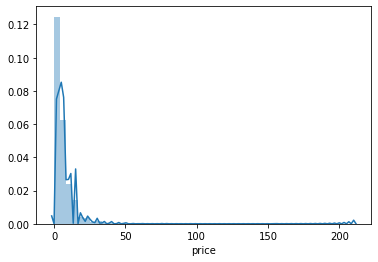

In [5]:
#histogram

sns.distplot(training_dataset['price']);

In [6]:
#skewness and kurtosis
print("Skewness: %f" % training_dataset['price'].skew())
print("Kurtosis: %f" % training_dataset['price'].kurt())

Skewness: 5.718368
Kurtosis: 85.991380


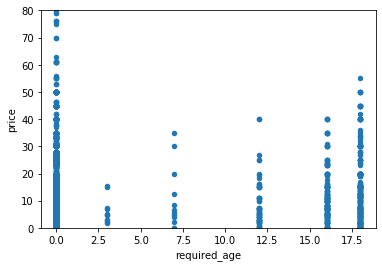

In [21]:
#scatter plot required_age v/s price
var = 'required_age'
data = pd.concat([training_dataset['price'],training_dataset[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,80));

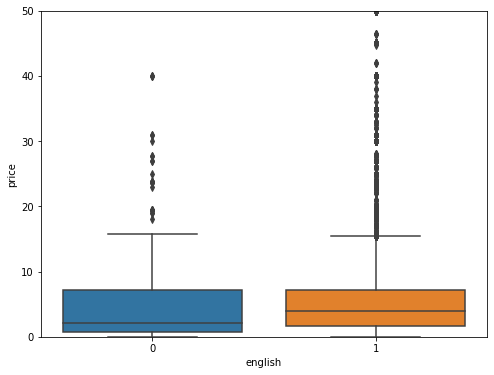

In [22]:
#box plot english v/s price
var = 'english'
data = pd.concat([training_dataset['price'], training_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=50);

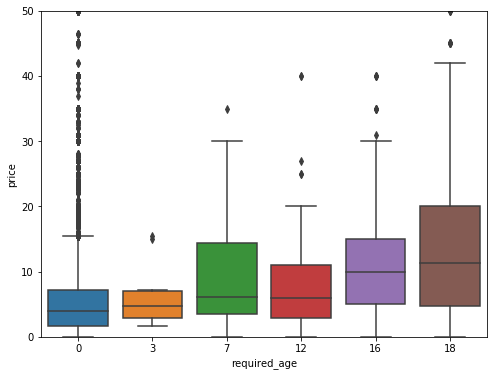

In [23]:
#box plot required_age v/s price
var = 'required_age'
data = pd.concat([training_dataset['price'], training_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=50);

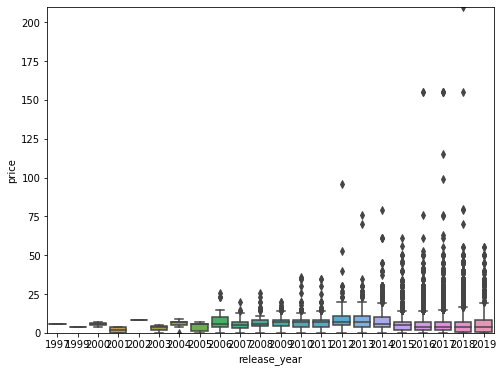

In [41]:
#box plot release_year v/s eprice
var = 'release_year'
data = pd.concat([training_dataset['price'], training_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=210);

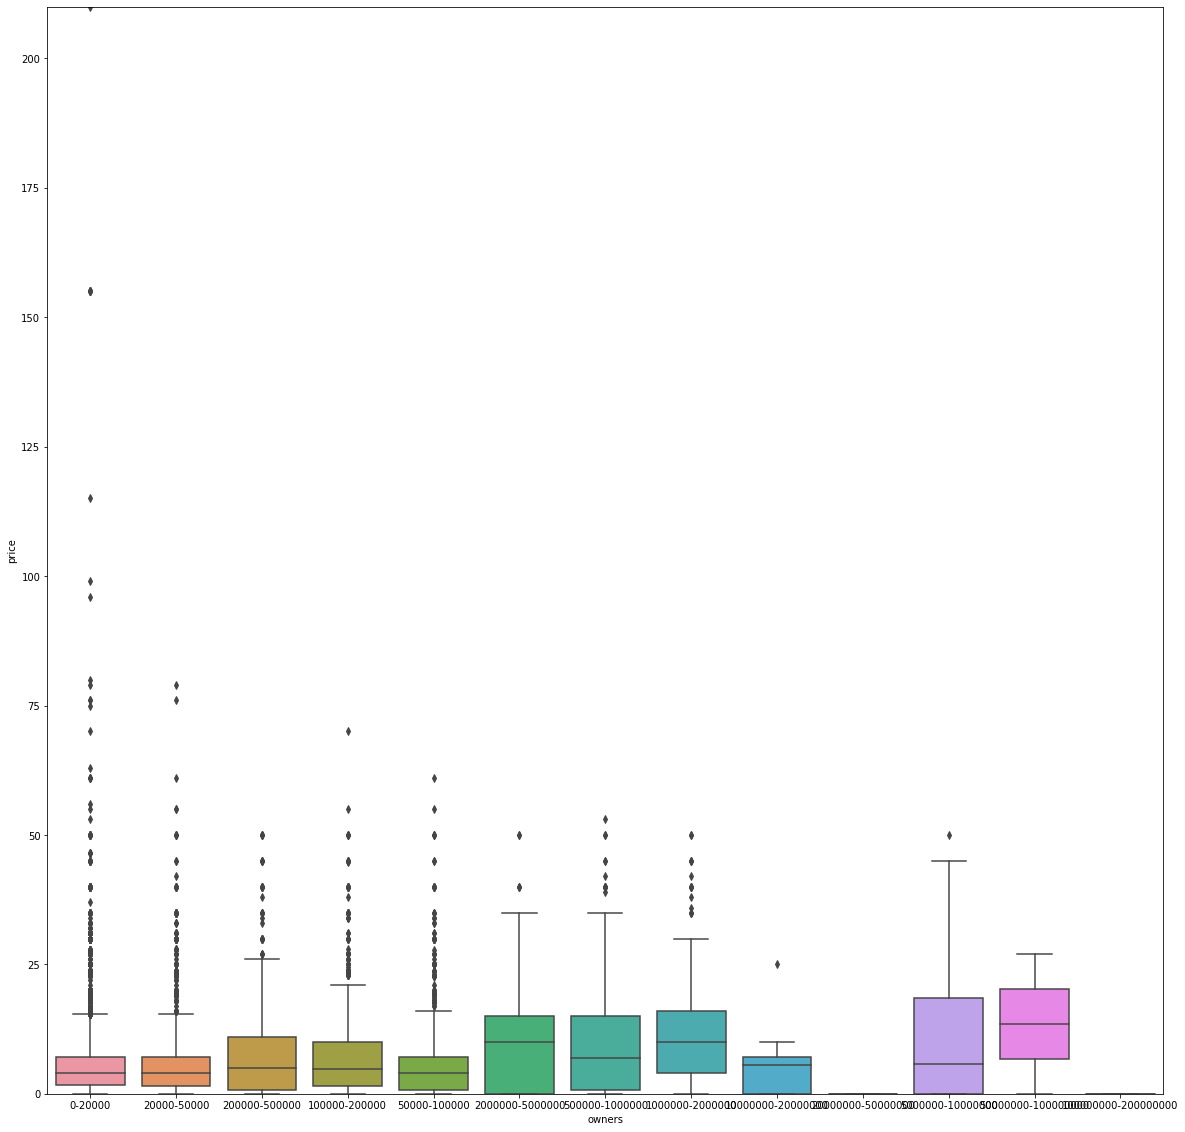

In [25]:
#box plot owners v/s price
var = 'owners'
data = pd.concat([training_dataset['price'], training_dataset[var]], axis=1)
f, ax = plt.subplots(figsize=(20,20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=210);

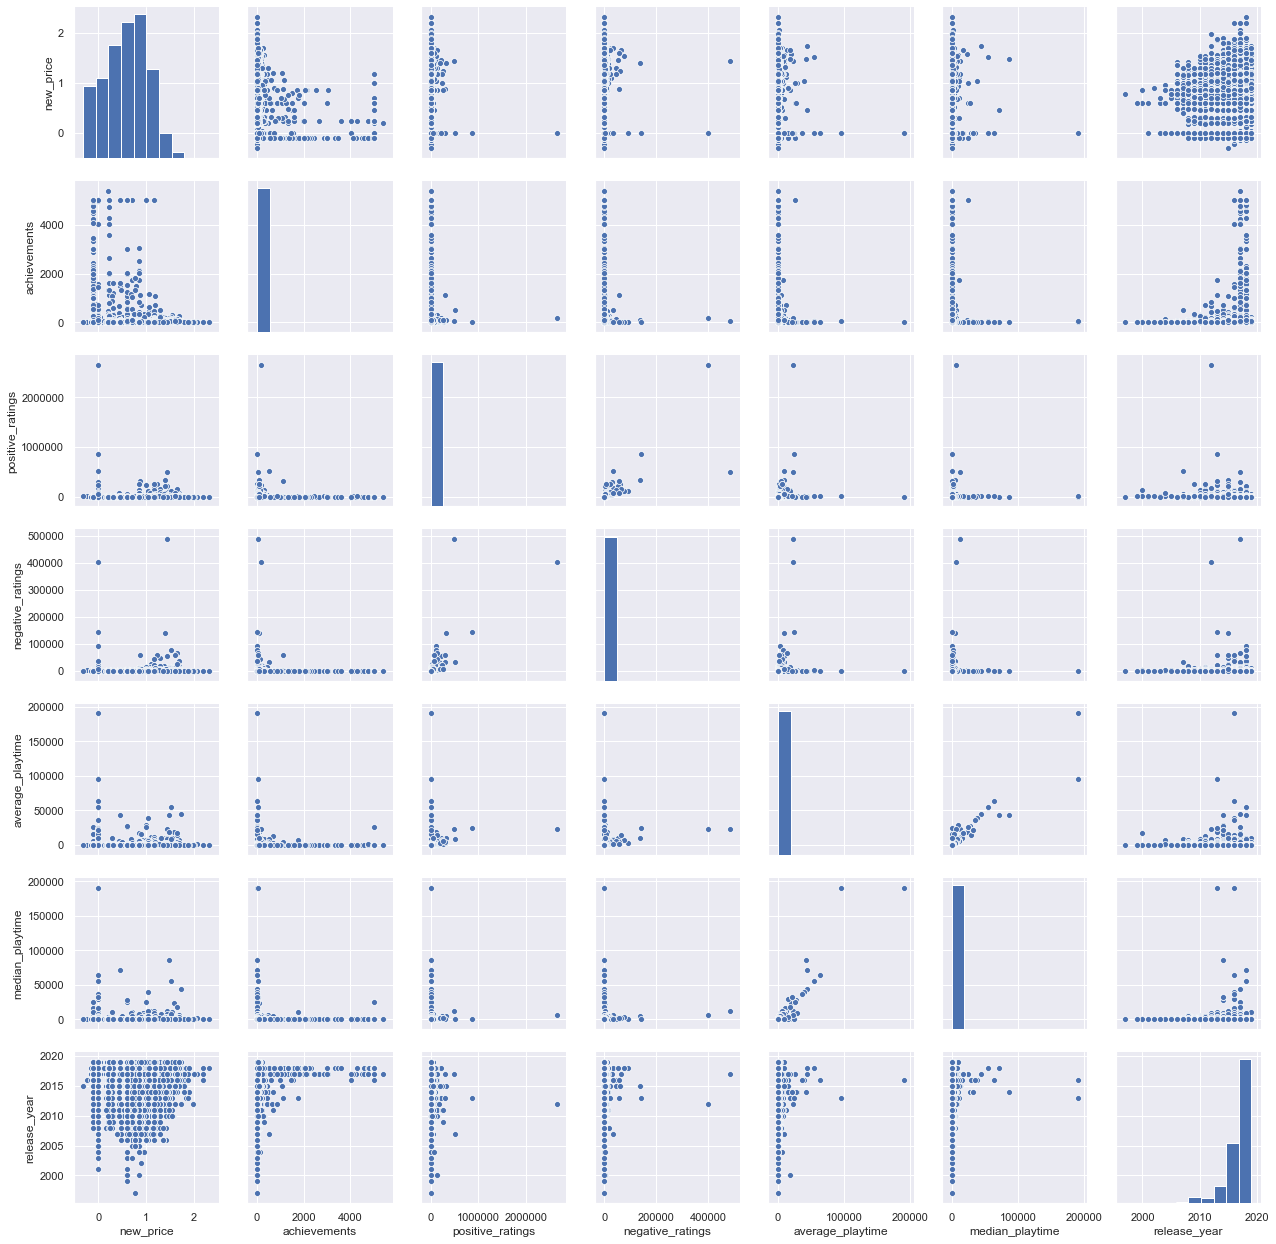

In [129]:
#scatterplot of different features with label(price)
sns.set()
cols = ['new_price', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'release_year']
sns.pairplot(training_dataset[cols], size = 2.5)
plt.show();

# Plotting various categorical features

In [109]:
training_dataset.shape

(25044, 19)

In [114]:
training_dataset.columns 

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [123]:
len(training_dataset['steamspy_tags'].unique())

6136

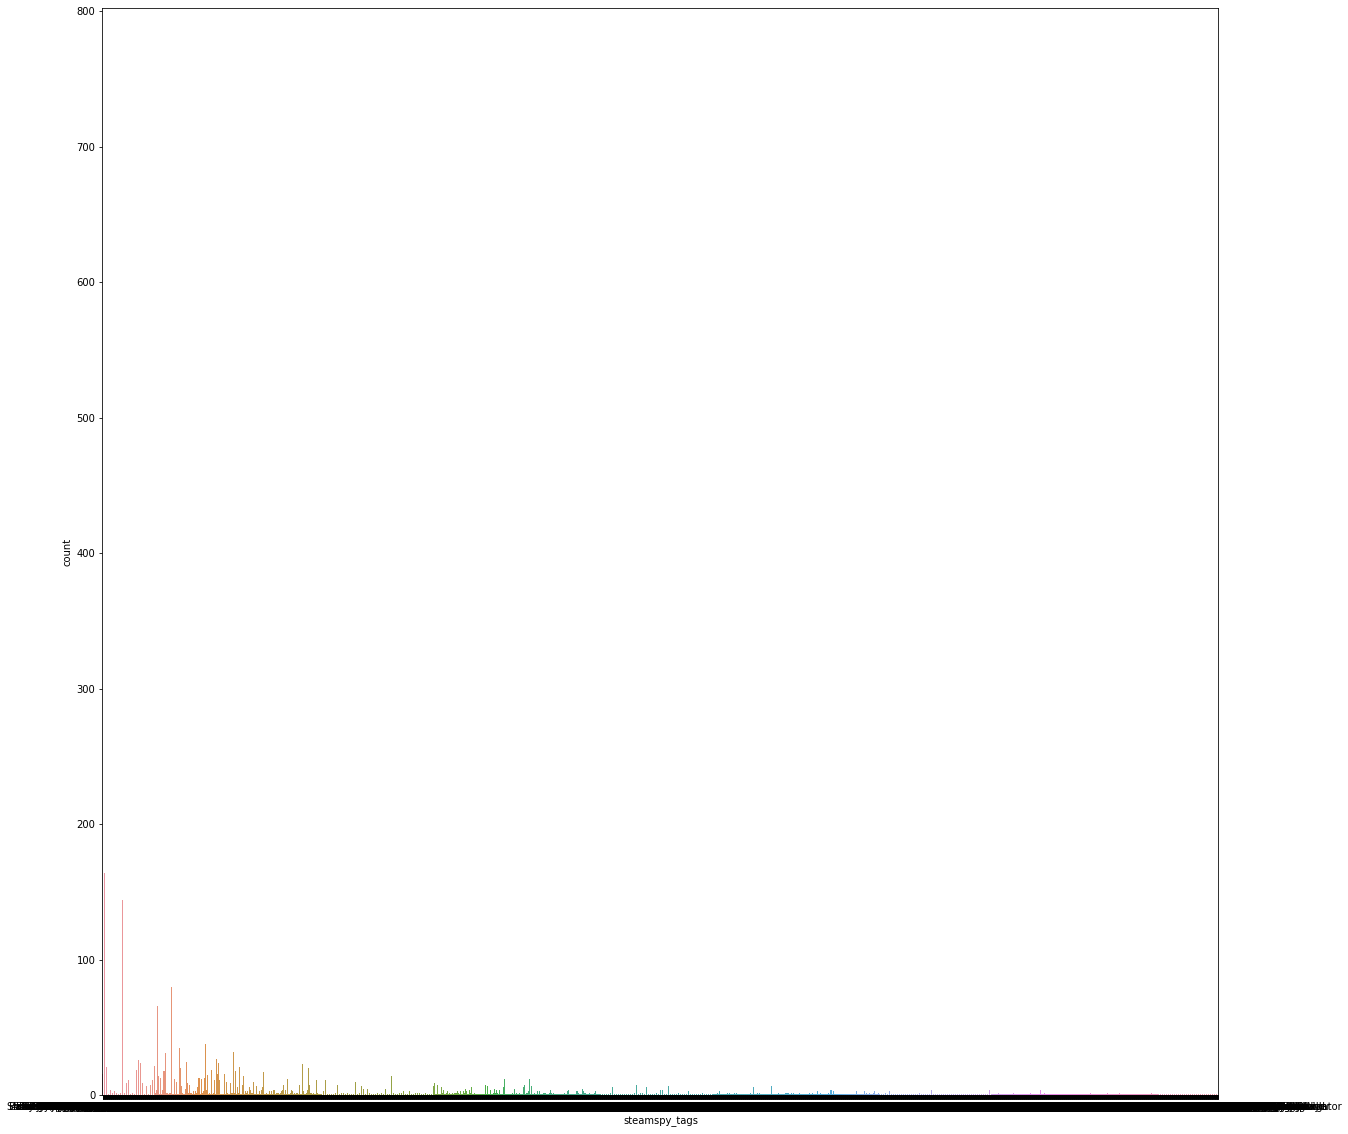

In [126]:
plt.figure(figsize=(20,20))
sns.countplot(x='steamspy_tags',data=training_dataset)

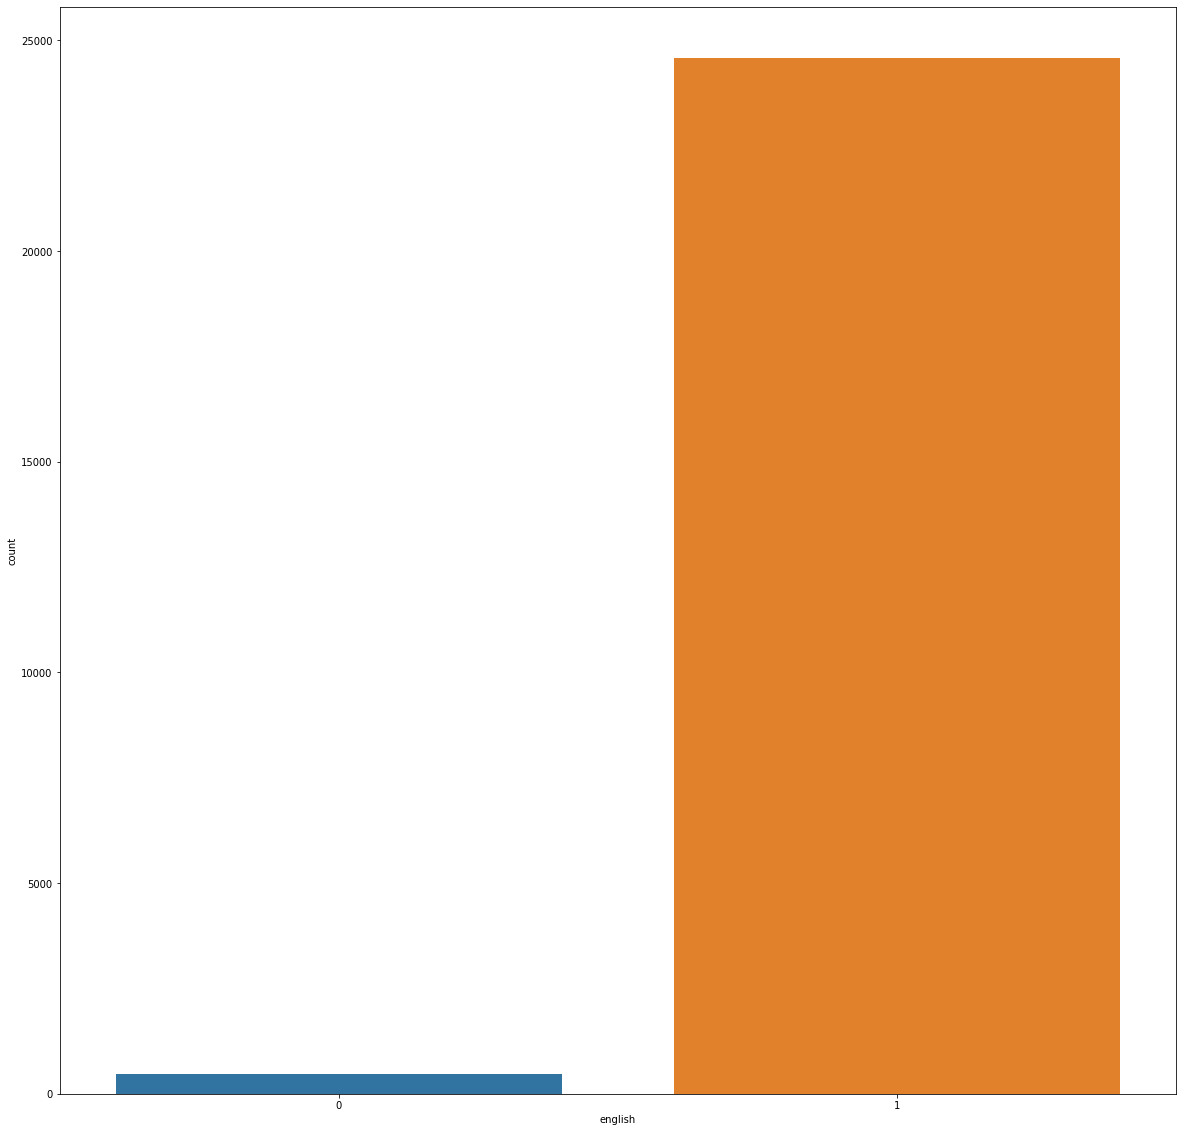

In [127]:
plt.figure(figsize=(20,20))
sns.countplot(x='english',data=training_dataset) #drop

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21941 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20048 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28216 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24037 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23736 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22495 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25112 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21414 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36194 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38626 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 31119 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28024 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 34382 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23713 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20820 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39746 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27941 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35895 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29677 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 29420 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28895 missing from current fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 34253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33590 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26657 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.se

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 25240 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32764 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39046 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24062 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28909 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27849 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21704 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35270 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22855 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38476 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29544 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31435 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35069 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12365 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12367 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12390 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24375 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 35760 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 27915 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 33905 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21313 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29275 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 27185 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29392 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 29432 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12460 missing from current font.
  

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26421 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32494 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22916 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 28459 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 23478 missing from current font.
  fon

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20919 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 31505 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40657 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22934 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21407 missing from current font.
  fon

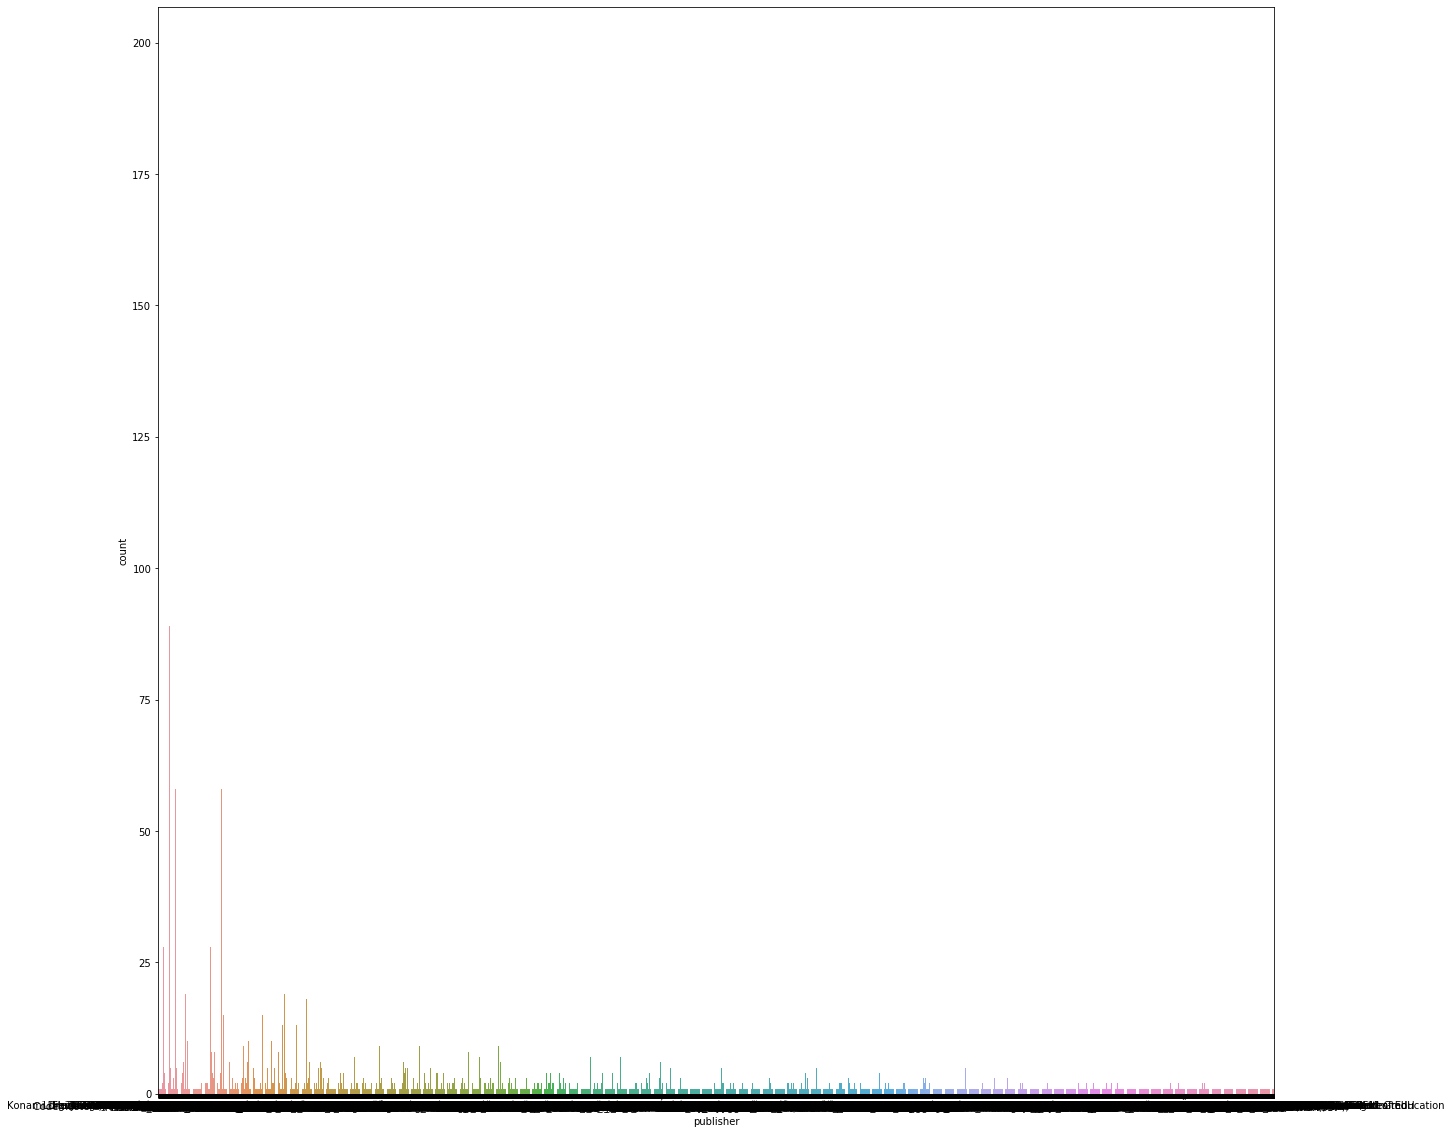

In [128]:
plt.figure(figsize=(20,20))
sns.countplot(x='publisher',data=training_dataset)

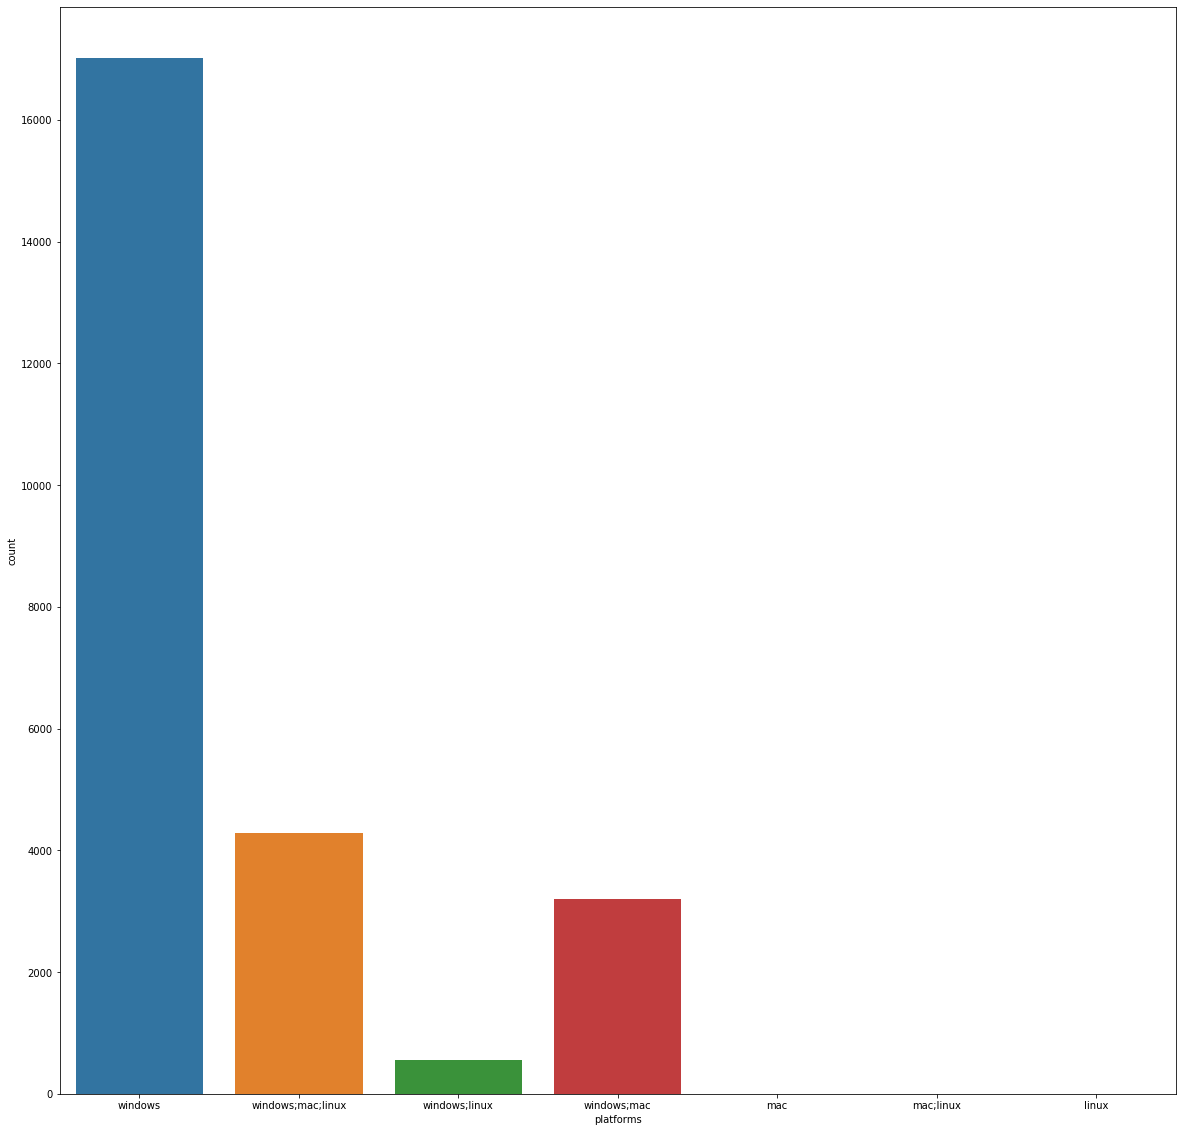

In [129]:
plt.figure(figsize=(20,20))
sns.countplot(x='platforms',data=training_dataset)  #drop windows

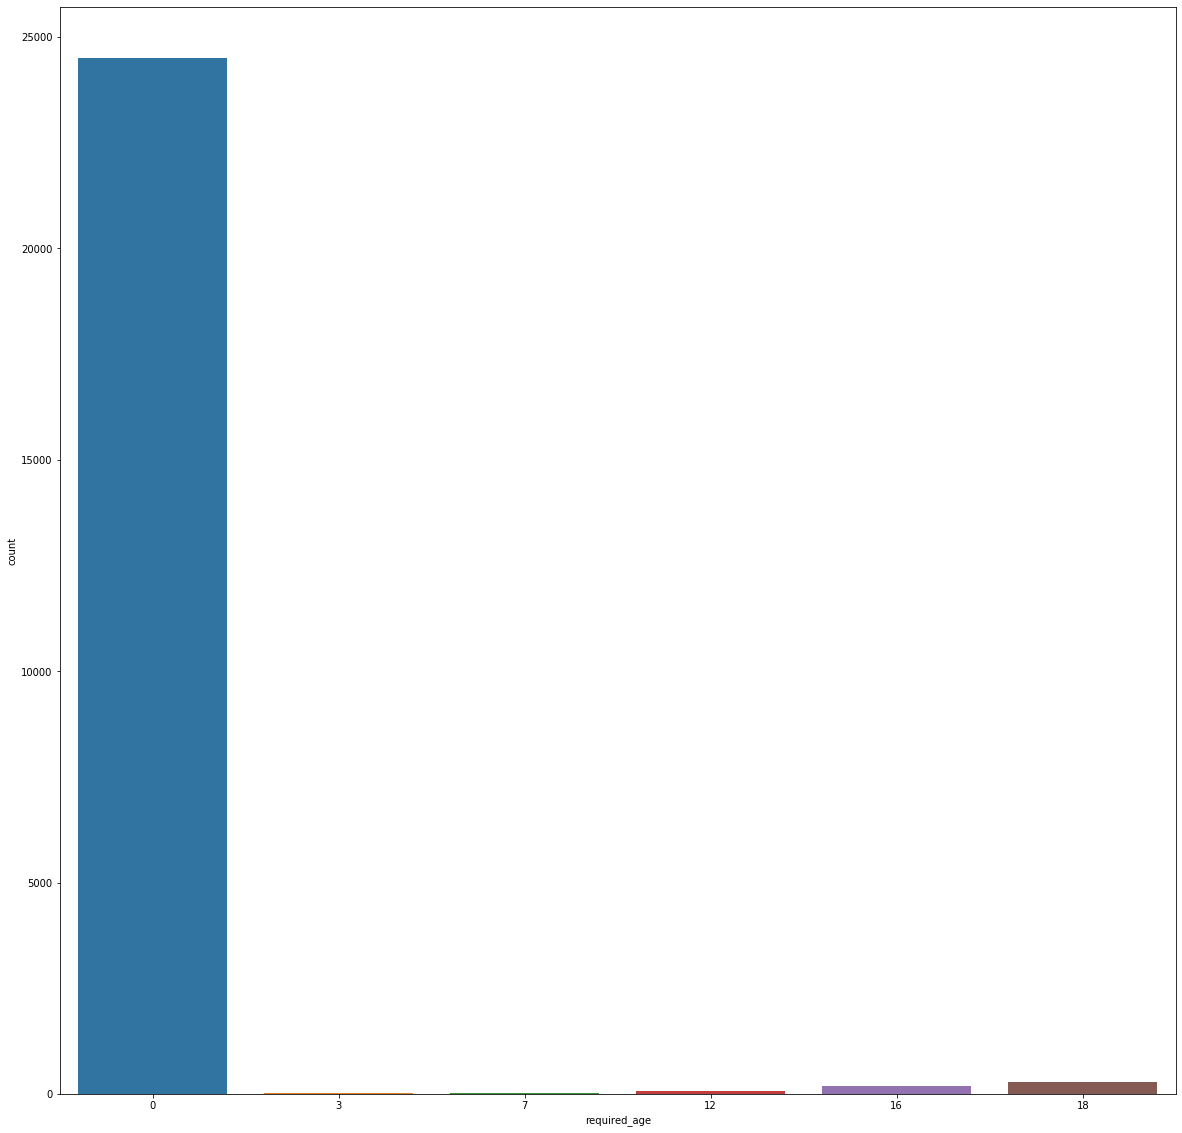

In [130]:
plt.figure(figsize=(20,20))
sns.countplot(x='required_age',data=training_dataset)  

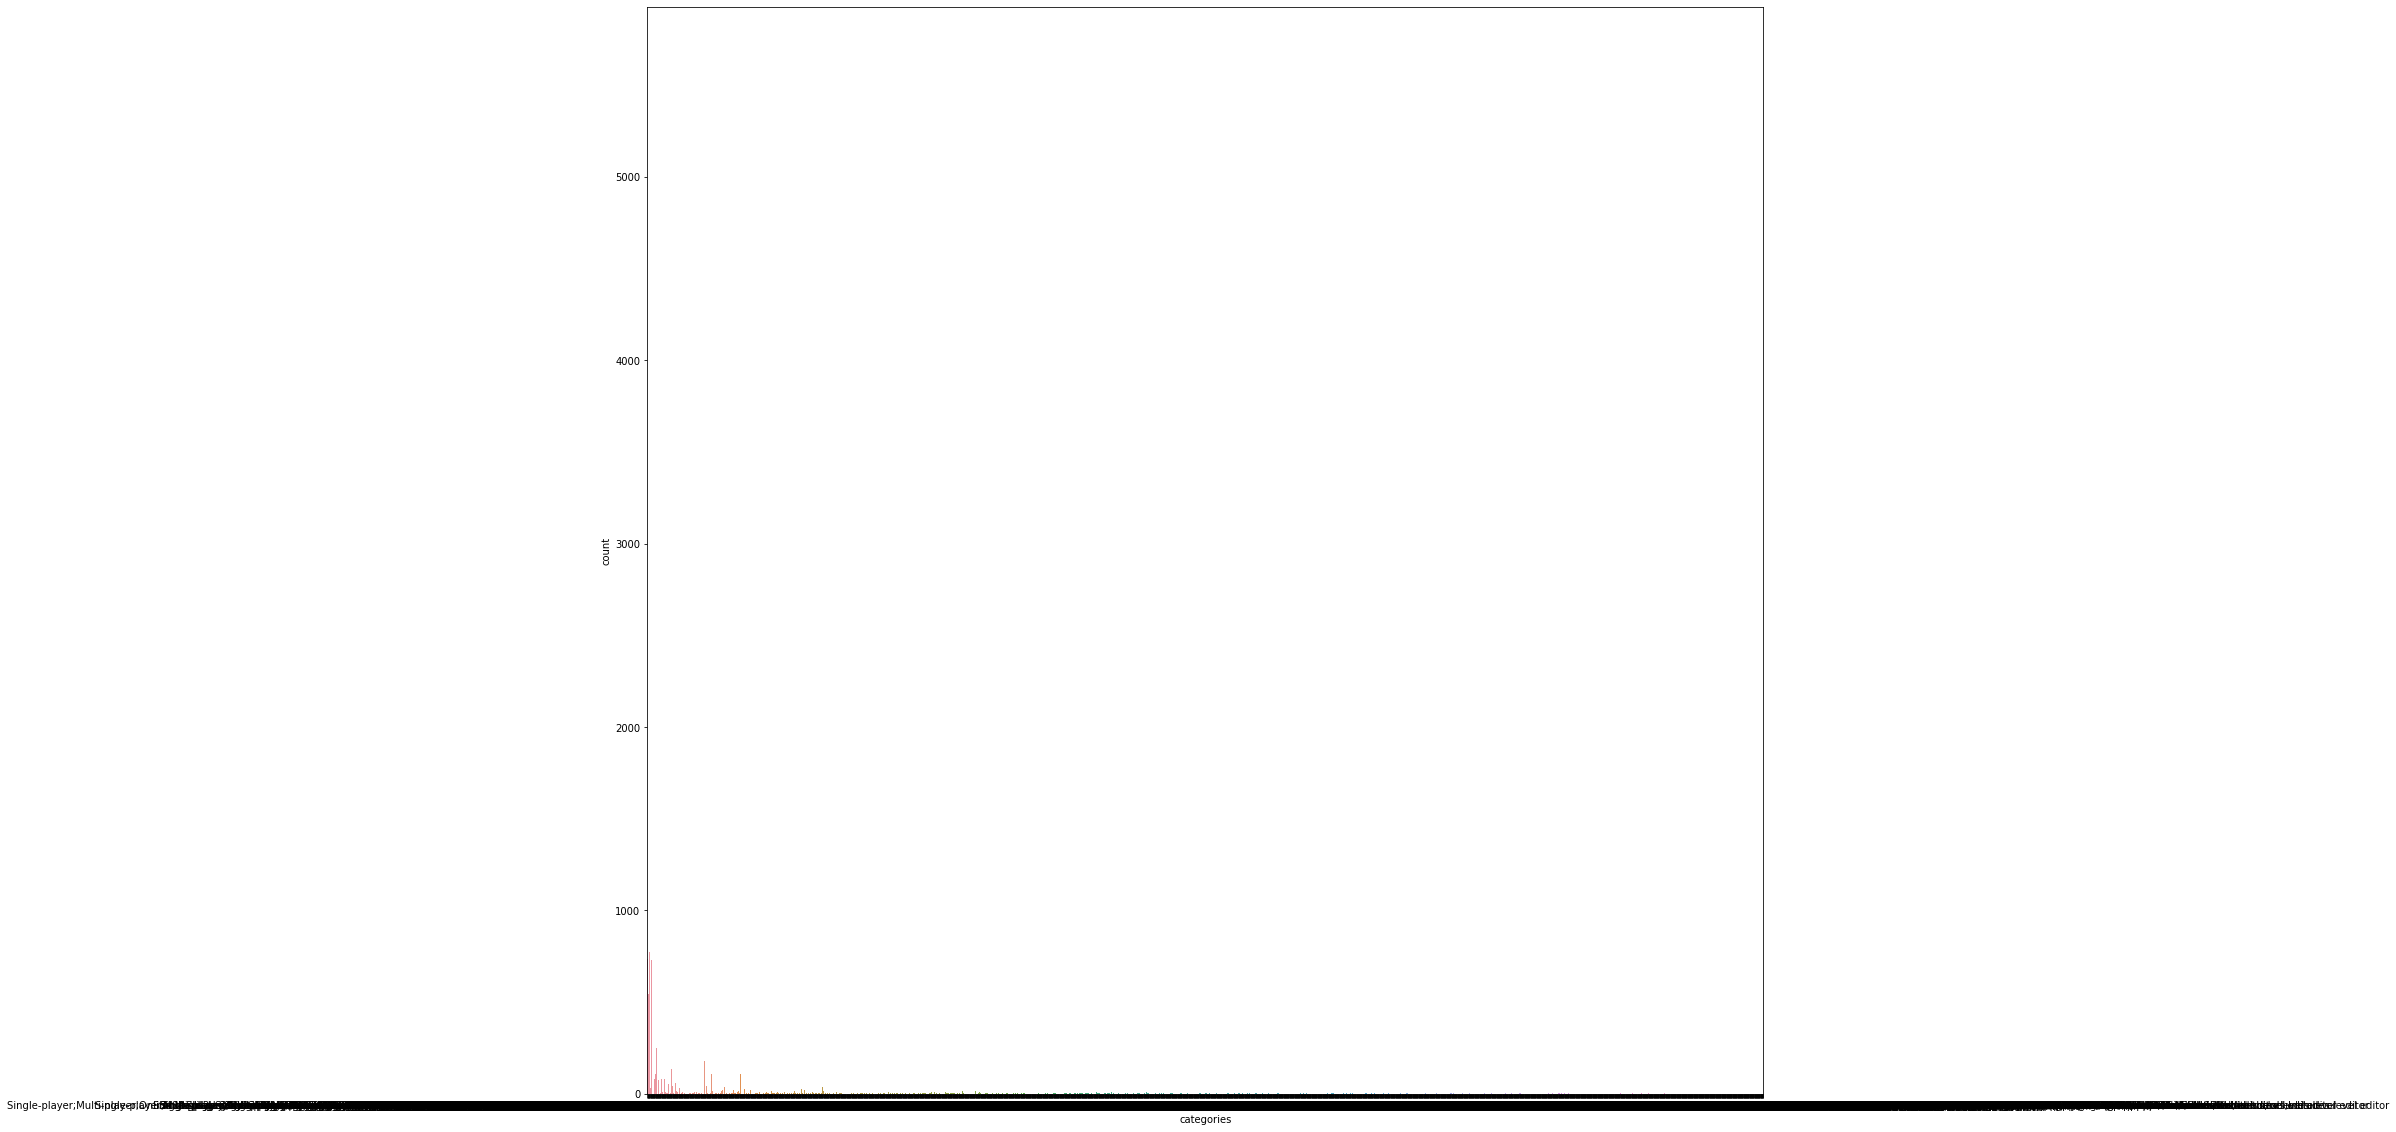

In [131]:
plt.figure(figsize=(20,20))
sns.countplot(x='categories',data=training_dataset) #drop

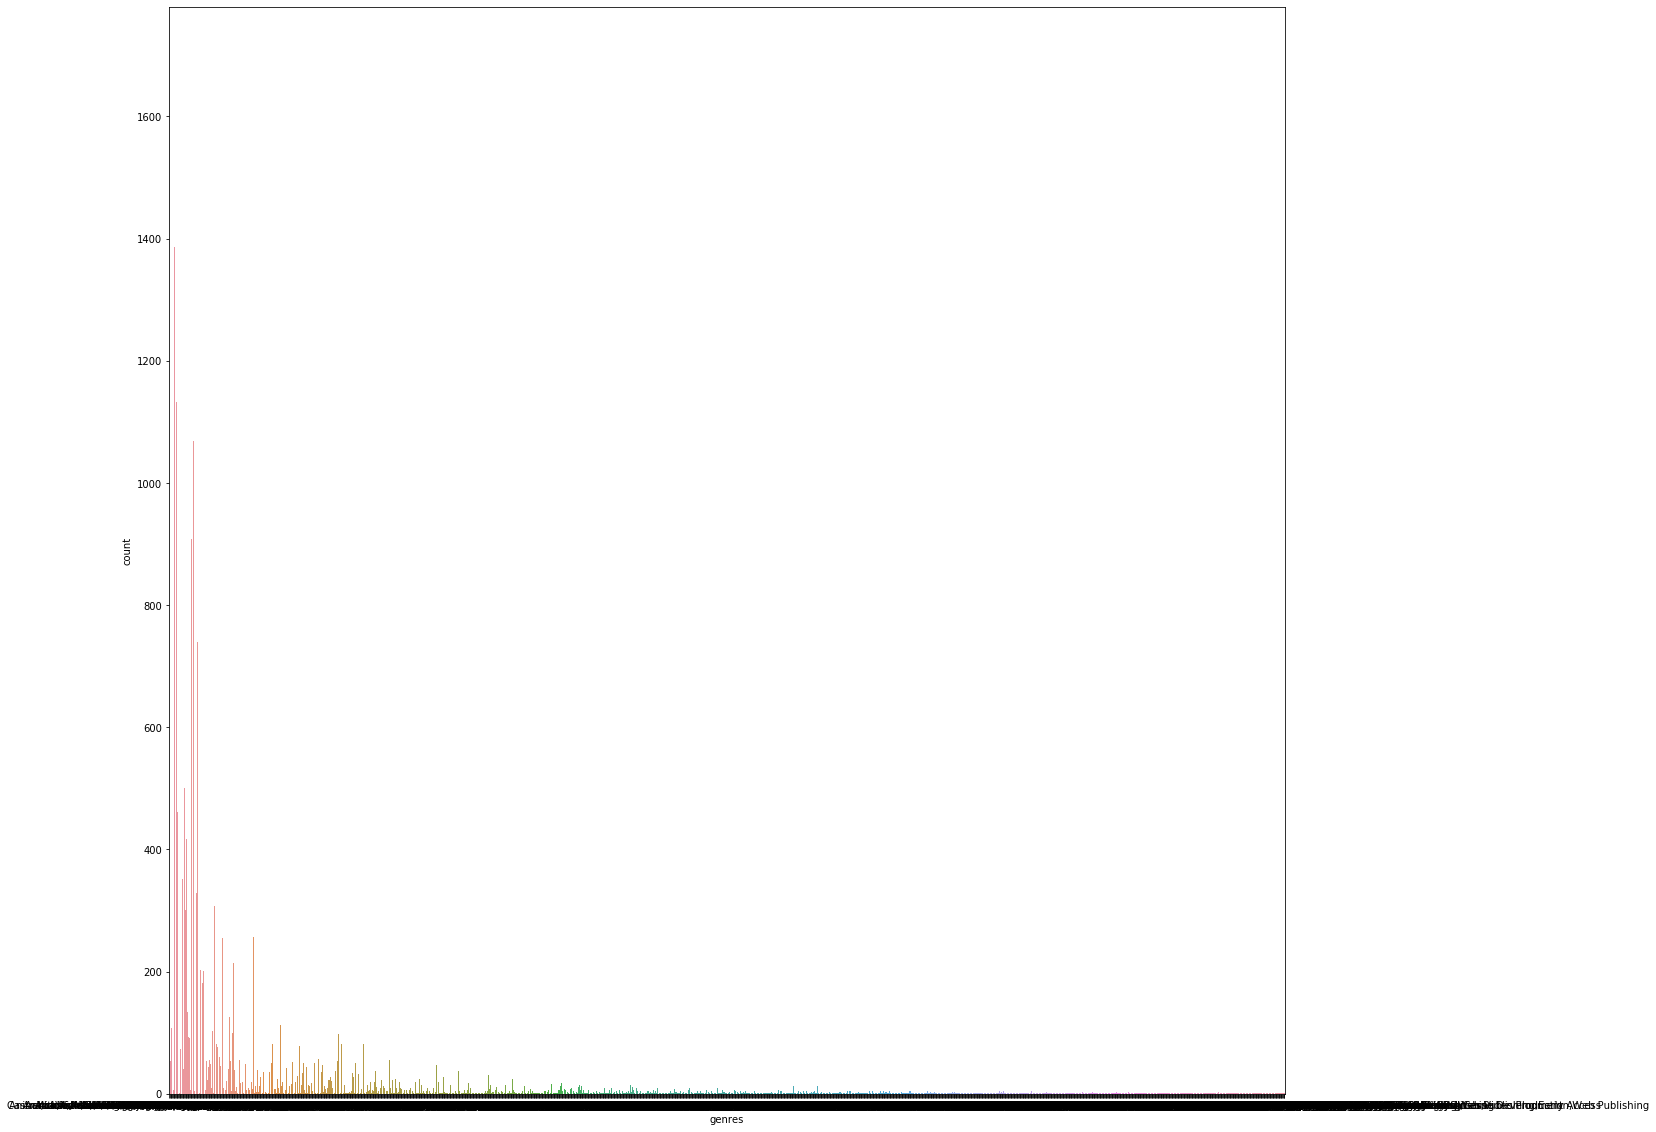

In [132]:
plt.figure(figsize=(20,20))
sns.countplot(x='genres',data=training_dataset)

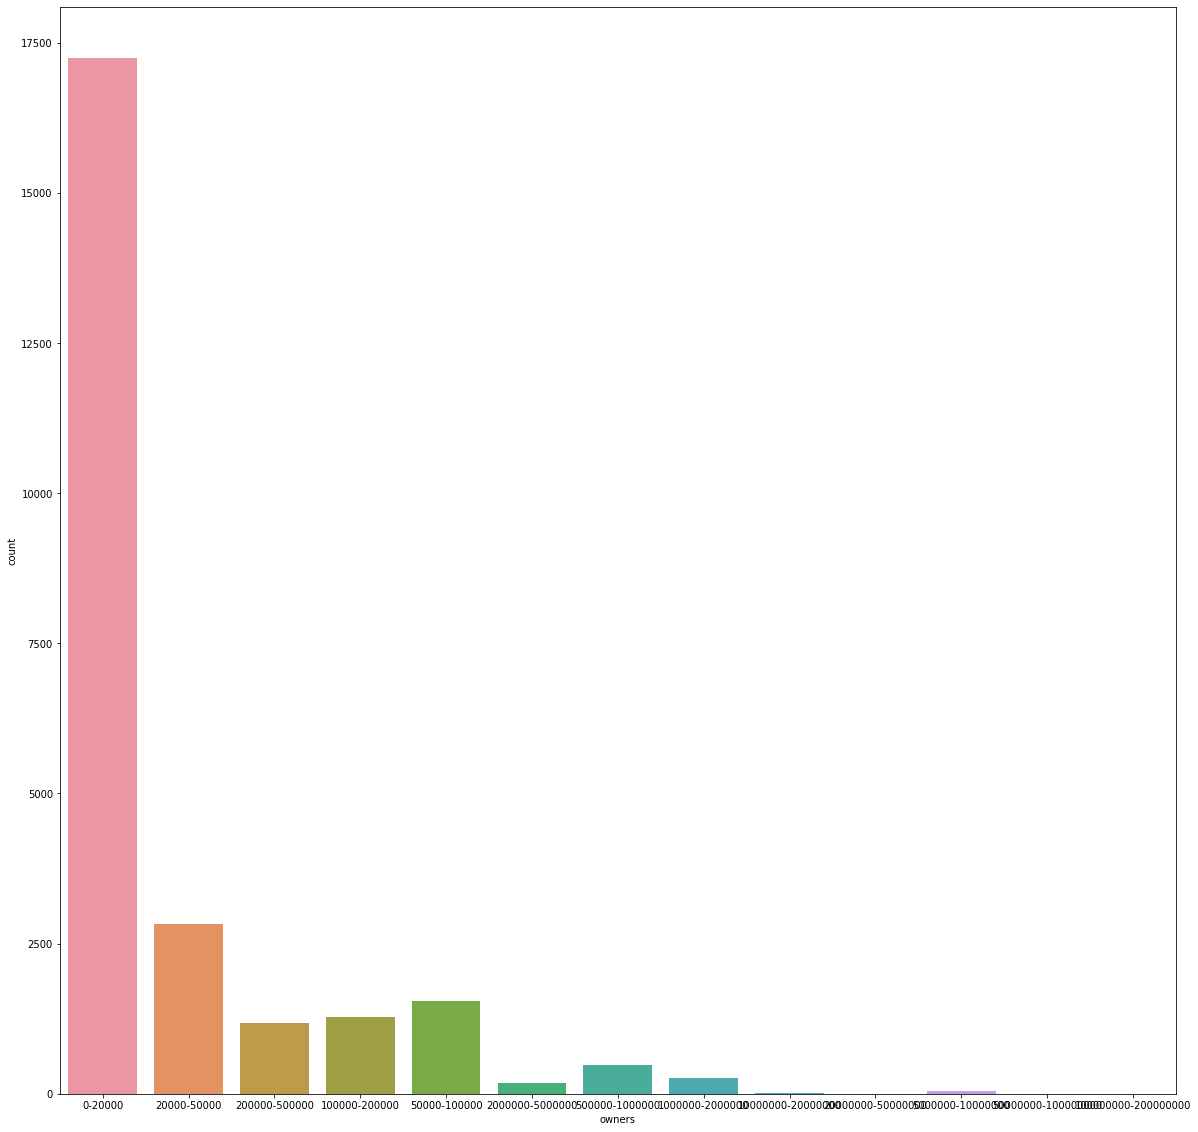

In [133]:
plt.figure(figsize=(20,20))
sns.countplot(x='owners',data=training_dataset) 

# Visualising features-steamspy_tags,publisher,categories,genres

In [135]:
training_dataset.categories.value_counts().head(10)

Single-player                                                                               5646
Single-player;Steam Achievements                                                            2176
Single-player;Steam Achievements;Steam Trading Cards                                         772
Single-player;Partial Controller Support                                                     735
Single-player;Steam Trading Cards                                                            730
Single-player;Steam Achievements;Steam Cloud                                                 614
Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud                             591
Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Steam Cloud     544
Single-player;Full controller support                                                        512
Single-player;Steam Achievements;Full controller support                                     436
Name: categories, dtype: int64

In [136]:
training_dataset.genres.value_counts().head(10)

Action;Indie              1695
Casual;Indie              1386
Action;Adventure;Indie    1132
Adventure;Indie           1068
Action;Casual;Indie        908
Action                     782
Adventure;Casual;Indie     739
Indie                      711
Casual                     519
Adventure                  500
Name: genres, dtype: int64

In [137]:
training_dataset.publisher.value_counts().head(10)

Big Fish Games         197
Strategy First         125
Ubisoft                102
Square Enix             93
THQ Nordic              93
Choice of Games         89
Sekai Project           89
1C Entertainment        82
Dagestan Technology     82
SEGA                    74
Name: publisher, dtype: int64

In [138]:
training_dataset.steamspy_tags.value_counts().head(10)

Action;Indie;Casual               764
Action;Adventure;Indie            650
Early Access;Action;Indie         473
Adventure;Indie;Casual            414
Indie;Casual                      354
Action;Indie;Adventure            294
Action;Indie                      267
Adventure;Casual;Hidden Object    227
Indie;Casual;Puzzle               224
Indie;Casual;Simulation           208
Name: steamspy_tags, dtype: int64

In [14]:
#converting categorical features with lesser unique values
def preprocess_data(dataset,feature_name,value):
    unique_array=np.array(dataset[feature_name].unique())
    counter_array=[]
    for name in unique_array:
        count=0
        for i in range(dataset.shape[0]):
            if(dataset[feature_name][i]==name):
                count+=1
        if(count<=value):
            counter_array.append(name)
    for i in range(dataset.shape[0]):
        name=dataset[feature_name][i]
        if(name in counter_array):
            dataset[feature_name][i]='other '+feature_name
    return counter_array

In [148]:
preprocess_data(training_dataset,'genres',1000)

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Casual',
 'Violent;Gore;Action;Indie',
 'Action;Casual;Indie;Strategy',
 'Casual;Indie;RPG',
 'Action',
 'Action;Adventure;Casual;Indie;RPG;Simulation;Early Access',
 'Simulation;Strategy',
 'Adventure;Casual;Indie;RPG',
 'Adventure;Casual',
 'Indie;RPG;Strategy;Early Access',
 'Casual;RPG;Simulation',
 'Audio Production;Utilities;Early Access',
 'Adventure;Indie;Strategy',
 'Violent;Action;Casual;Indie;Strategy;Early Access',
 'Casual;Indie;Strategy',
 'Casual;Indie;Simulation',
 'Violent;Gore;Action;Adventure;Indie',
 'Action;Adventure;Free to Play;Indie',
 'Adventure',
 'Action;Adventure;Indie;RPG',
 'Adventure;Indie;RPG',
 'Adventure;Indie;Simulation',
 'Adventure;Casual;Indie;Simulation',
 'Action;RPG',
 'Casual;Strategy',
 'Indie;Strategy',
 'Sports;Strategy',
 'Action;Casual;Indie',
 'Sexual Content;Nudity;Action;Casual;Indie',
 'Indie',
 'Video Production',
 'Sexual Content;Nudity;Casual;Indie',
 'Indie;Simulation;Sports;Strategy;Early Access',
 'Action;Adventure',
 'Adventur

In [149]:
preprocess_data(training_dataset,'steamspy_tags',400)

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Action;Indie;Space',
 'Casual;VR;Anime',
 'Action;Metroidvania;Indie',
 "Action;Indie;Shoot 'Em Up",
 'Indie;Action;Casual',
 'Indie;Casual;RPG',
 'Action;Shooter;Isometric',
 'Early Access;Adventure;Indie',
 'Indie;Casual',
 'Casual;Nudity;Sexual Content',
 'Simulation;Strategy;Management',
 'Adventure;RPG;Indie',
 'Adventure;Casual;Hidden Object',
 'Early Access;Strategy;Indie',
 'Action;Indie;Platformer',
 'Casual;Simulation;RPG',
 'Early Access;Utilities;Audio Production',
 'Indie;Strategy;Adventure',
 'Casual;Hidden Object',
 'Strategy;Indie;Casual',
 'Sexual Content;Nudity;Indie',
 'Casual;Indie;Puzzle',
 'Indie;Action;Violent',
 'Action',
 'Free to Play;Action;Indie',
 'Adventure;VR',
 'Dinosaurs;Action;FPS',
 'Adventure;Hidden Object;Point & Click',
 'Indie;Casual;VR',
 'Action;Indie;Difficult',
 'Indie;Adventure;Simulation',
 'Anime;Casual;Simulation',
 'RPG;Fantasy;Story Rich',
 'Strategy;Casual',
 'Tower Defense;Strategy;Indie',
 'Sports;Strategy;Football',
 'Indie;Casual;

In [150]:
preprocess_data(training_dataset,'publisher',100)

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['DysTop',
 'Degica',
 'Matt Bitner Games',
 'Nyu Media',
 'The Quantum Astrophysicists Guild',
 'Paper Scorpion Co.',
 'Team17 Digital Ltd',
 'Red13Indie',
 'azimut team',
 'Night Dreams Studio',
 'Assemble Entertainment',
 'Desert Owl Games LLC',
 'Forever Entertainment S. A.',
 'Zinnusl',
 'Team Reptile',
 'Afterthought Studios',
 'CINEMAX, s.r.o.',
 'Rock Path Collective',
 'Libredia',
 'RL Agency',
 'Plug In Digital',
 '橘喵喵',
 'SlyGames',
 'Ludomo Gamestudio',
 'Lorenzo Games;Michael L. Fiorentino Gutierrez',
 'Stem Tech',
 'Fireroot Studios',
 'RTVE',
 'DANKIE',
 'Ludovic Lafferayrie',
 'Nathaniel Powell',
 'Intelligent Systems',
 'GGaming',
 'Xorcerox',
 'CD PROJEKT RED;1C-SoftClub',
 '8floor',
 'Kuno Interactive',
 'Cyanide Studio',
 'Just1337 Publisher',
 'oblomysh;EHTechnology',
 'Anarteam;Plug In Digital',
 ' Metal Fox',
 'Vangelis Stavrogiannis',
 'Chucklefish',
 'VRLive',
 'Razzart Visual',
 'Excalibur Games',
 'BIG WOOD GAMES',
 'Circus Atos',
 'Dragon Fire Games Inc',
 '

In [15]:
preprocess_data(training_dataset,'categories',555)

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Single-player;Local Co-op;Shared/Split Screen;Steam Achievements;Full controller support;Steam Cloud',
 'Single-player;Steam Achievements;Steam Trading Cards;Partial Controller Support;Steam Cloud;Steam Leaderboards',
 'Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Steam Cloud',
 'Single-player;Steam Achievements;Steam Trading Cards;Stats;Steam Leaderboards',
 'Single-player;Co-op;Steam Achievements;Partial Controller Support;Stats;Steam Leaderboards',
 'Single-player;Multi-player;Online Multi-Player;Co-op;Online Co-op',
 'Single-player;Shared/Split Screen;Steam Achievements;Full controller support;Steam Cloud;Stats',
 'Steam Achievements;Steam Trading Cards',
 'Single-player;Stats',
 'Single-player;Multi-player;Online Multi-Player;Local Multi-Player;Steam Achievements;Steam Trading Cards;Partial Controller Support;Steam Cloud;Stats;Steam Leaderboards',
 'Single-player;Multi-player;Online Multi-Player;Co-op;Online Co-op;Steam Achievements;Full controlle

In [27]:
training_dataset

,appid,name,english,developer,publisher,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,windows,mac,linux,release_year
0,708830,The Armament Project,1,DysTop,other publisher,0,Single-player;Partial Controller Support,Action;Indie,other steamspy_tags,0,2,2,0,0,0-20000,2.89,1,0,0,2017
1,538000,Hop Step Sing! Kisekiteki Shining! (HQ Edition),1,Kodansha;Polygon Pictures Inc.;Lantis,other publisher,0,Single-player;Partial Controller Support,other genres,other steamspy_tags,0,30,4,0,0,0-20000,3.99,1,0,0,2017
2,603530,A Robot Named Fight!,1,Matt Bitner Games,other publisher,0,other categories,other genres,other steamspy_tags,60,271,30,279,279,20000-50000,10.29,1,1,1,2017
3,564040,ZANGEKI WARP,1,ASTRO PORT,other publisher,0,other categories,Action;Indie,other steamspy_tags,53,16,0,0,0,0-20000,4.79,1,0,1,2017
4,951940,Almost There: The Platformer,1,Bony Yousuf,other publisher,0,other categories,other genres,other steamspy_tags,24,29,1,0,0,0-20000,7.19,1,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25039,838490,Theorem,1,Geckoo1337,other publisher,0,Single-player;Steam Achievements,Casual;Indie,other steamspy_tags,9,15,0,0,0,0-20000,0.79,1,0,0,2018
25040,363970,Clicker Heroes,1,Playsaurus,other publisher,0,other categories,other genres,other steamspy_tags,111,42530,4734,9742,463,>=1000000,0.00,1,1,0,2015
25041,46540,Trapped Dead,1,Headup Games / Crenetic,other publisher,0,other categories,other genres,other steamspy_tags,0,258,410,142,157,100000-200000,3.99,1,0,0,2011
25042,671650,Mad Age & This Guy,1,Atomic Wolf,other publisher,0,other categories,other genres,other steamspy_tags,36,48,8,0,0,0-20000,3.99,1,0,0,2017


In [34]:
value=1000000
for i in range(training_dataset.shape[0]):
    name=training_dataset['owners'][i]
    arr=name.split('-')
    val1=int(arr[0])
    val2=int(arr[1])
    if(val1>=value or val2>=value):
        training_dataset['owners'][i]='>=1000000'

ValueError: invalid literal for int() with base 10: '>=1000000'

In [28]:
#saving our changes dataset for further usage
training_dataset.to_csv('Training.csv',header=True,index=False)

In [57]:
#importing new training dataset
training_dataset=pd.read_csv('Training.csv')

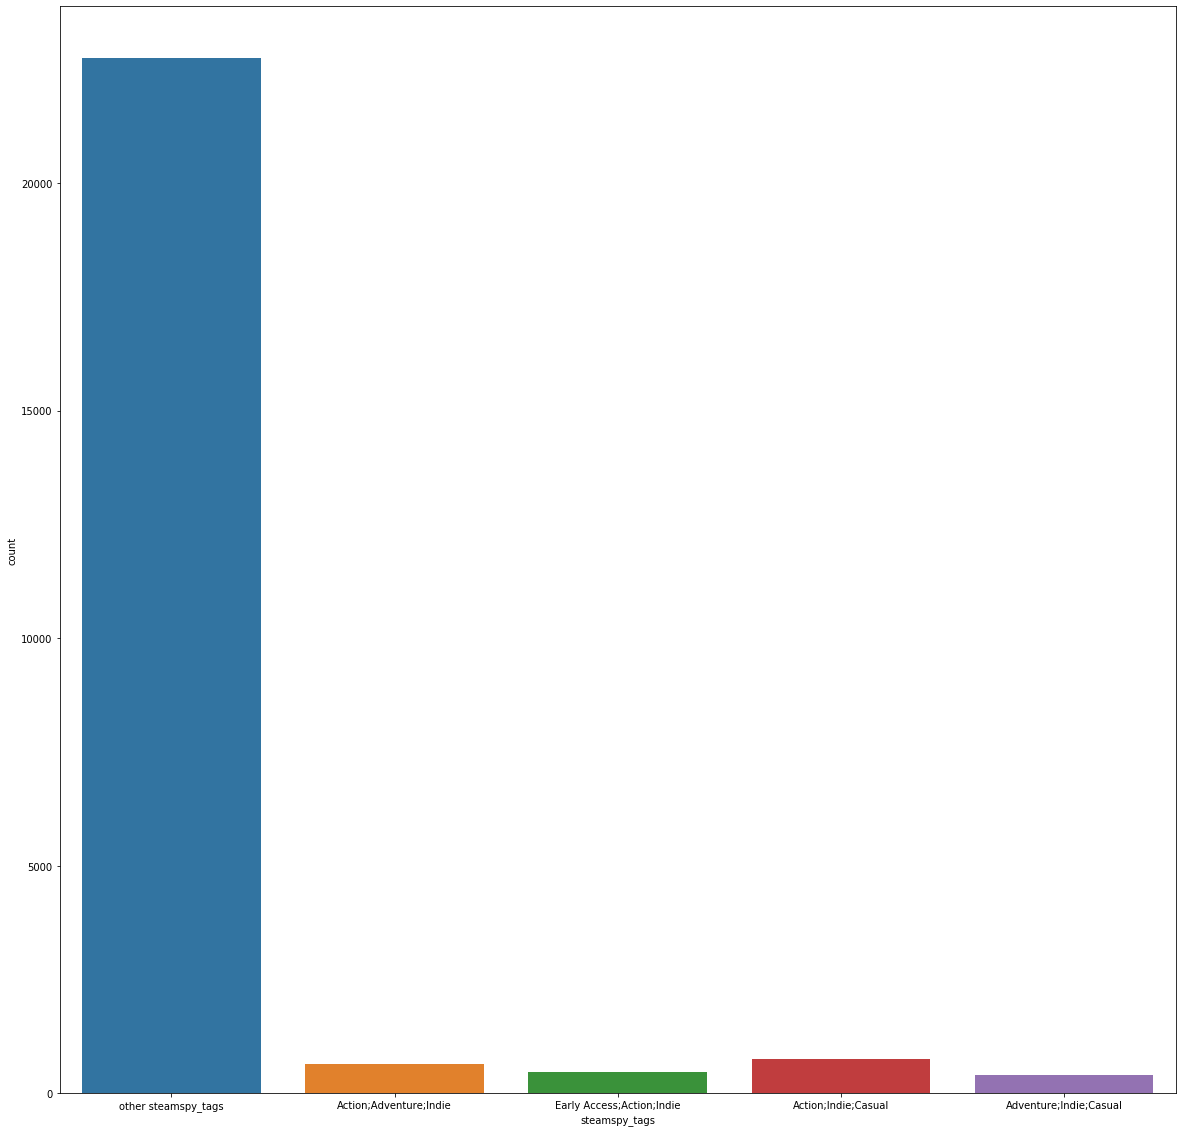

In [58]:
#bar plot for steamspy_tags
plt.figure(figsize=(20,20))
sns.countplot(x='steamspy_tags',data=training_dataset)

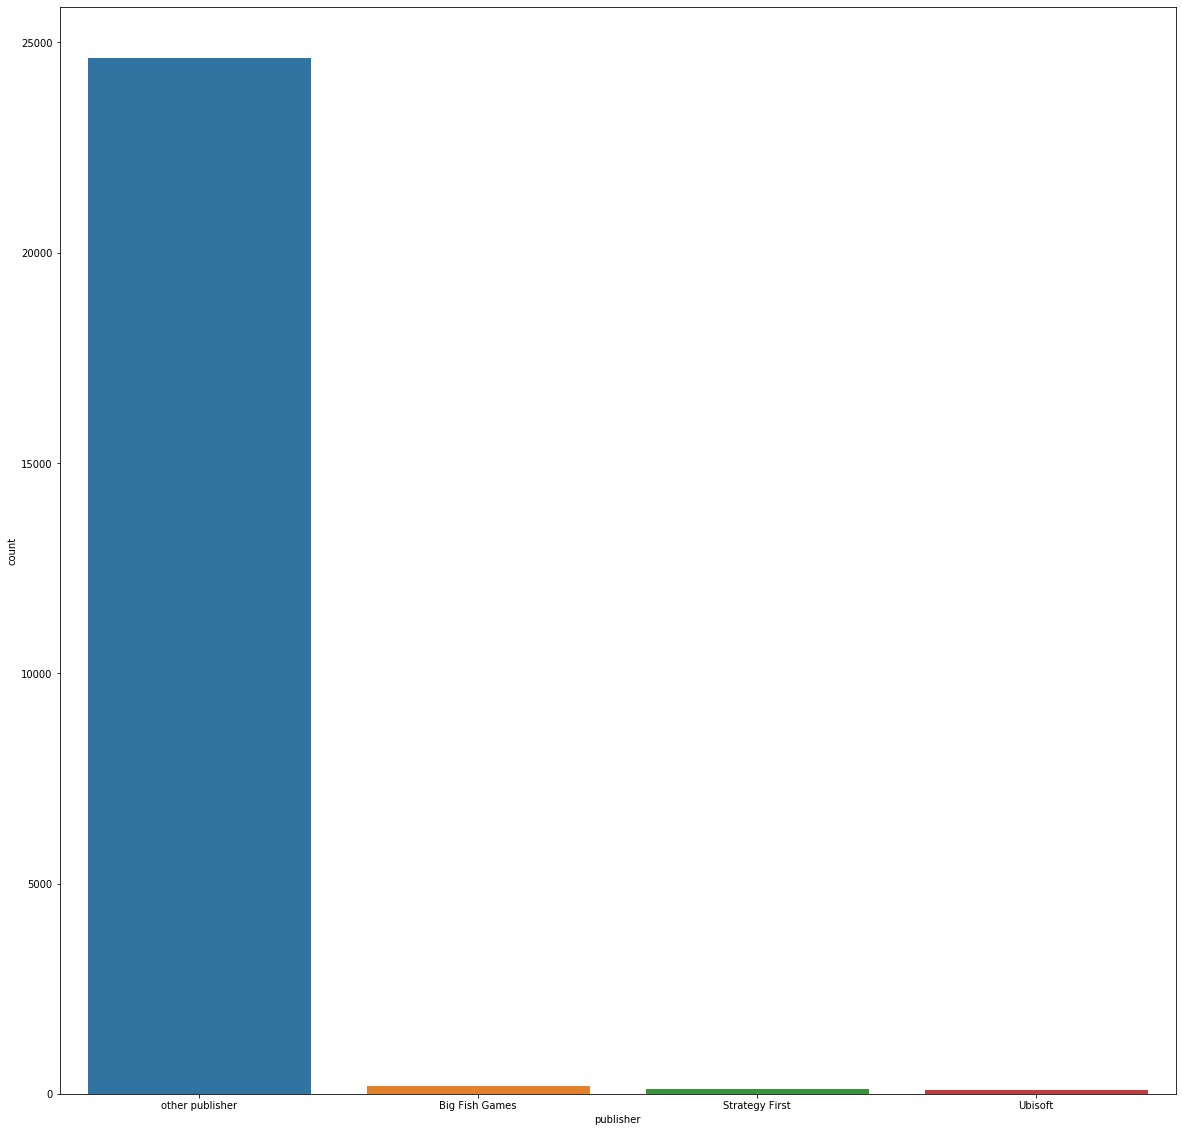

In [59]:
#bar plot of frequency for publisher feature
plt.figure(figsize=(20,20)) 
sns.countplot(x='publisher',data=training_dataset)

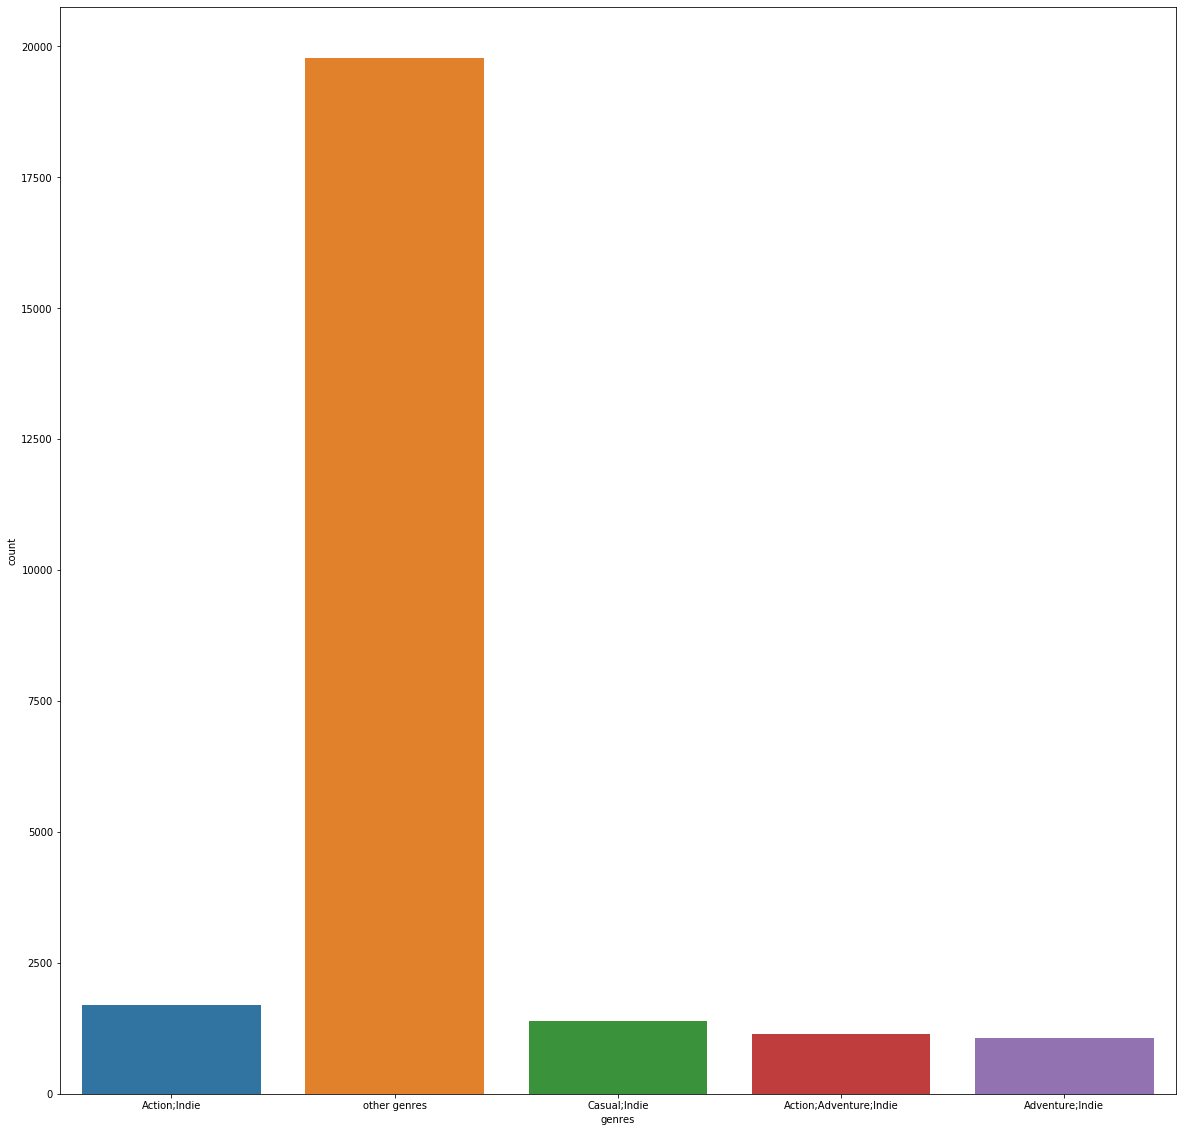

In [60]:
#bar plot for genres categorical feature
plt.figure(figsize=(20,20)) 
sns.countplot(x='genres',data=training_dataset)

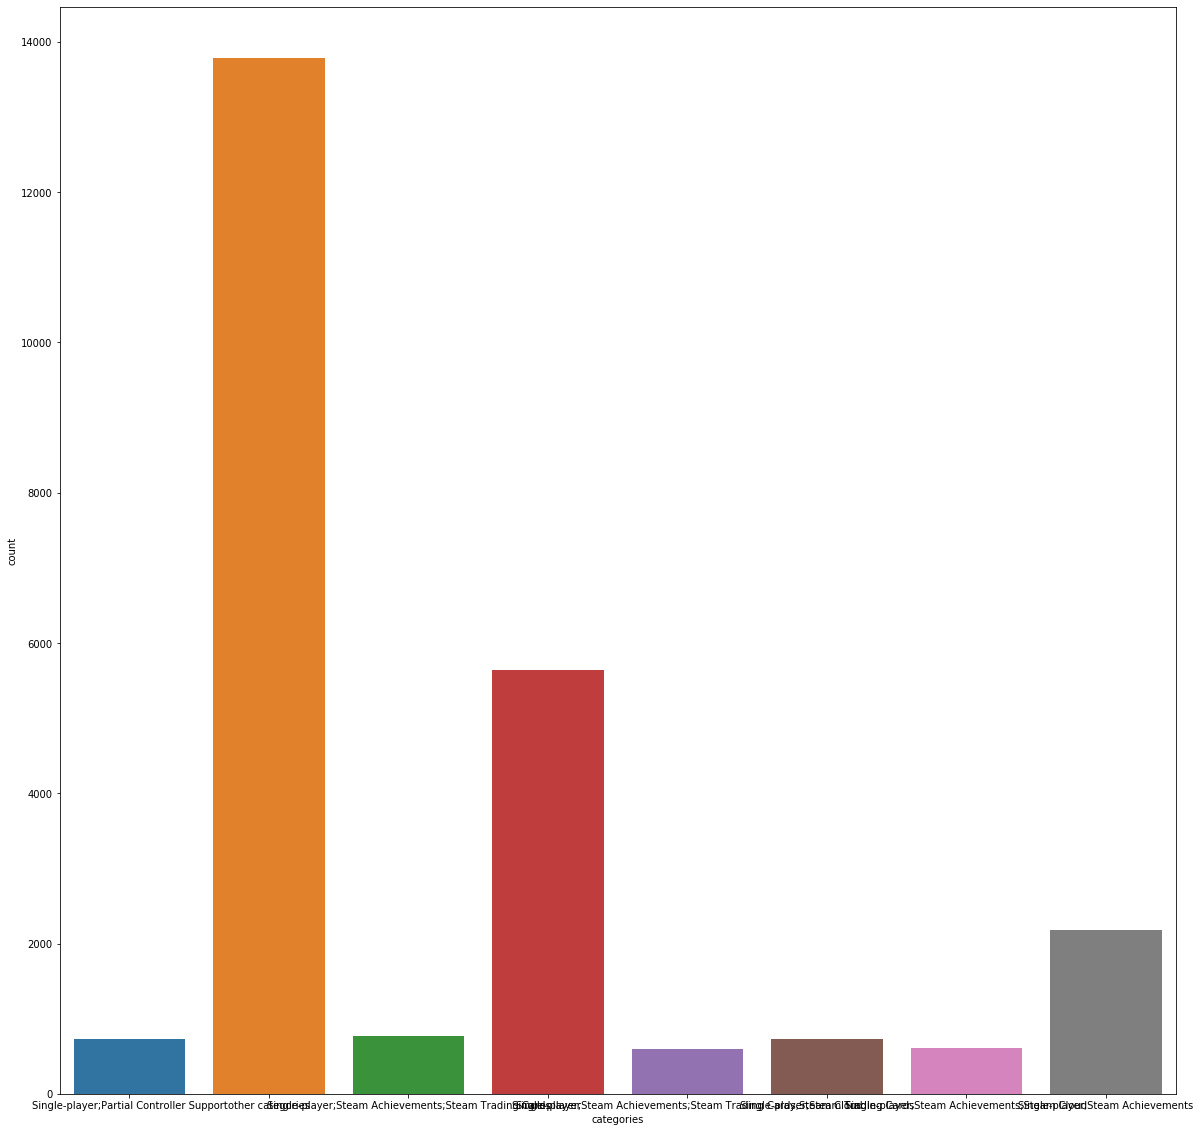

In [61]:
#bar plot for categories categorical feature
plt.figure(figsize=(20,20))
sns.countplot(x='categories',data=training_dataset)

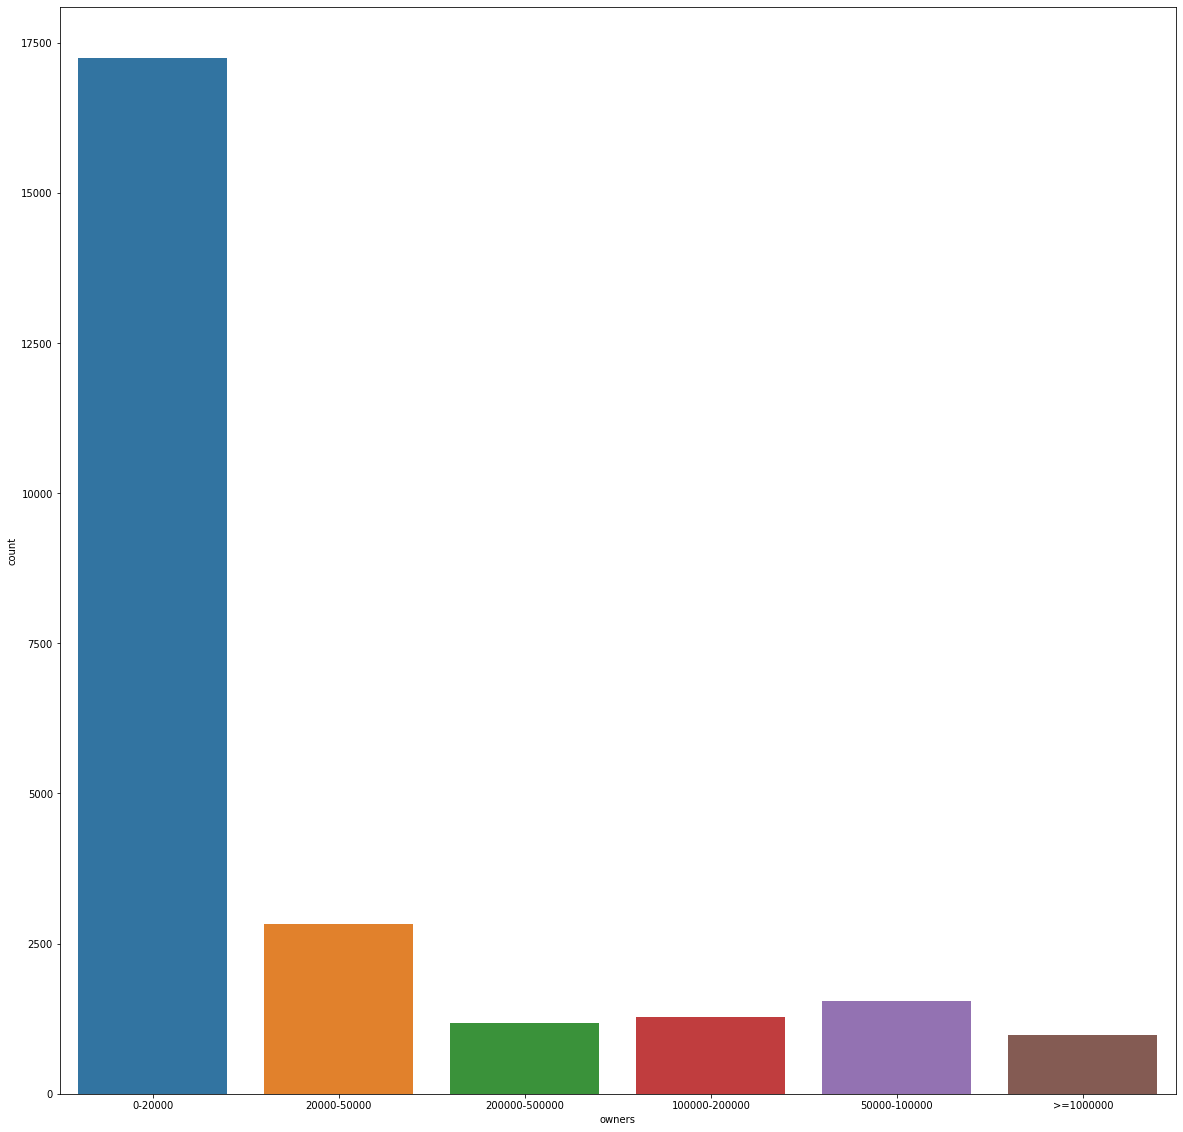

In [62]:
z#plotting owners categorical feature
plt.figure(figsize=(20,20))
sns.countplot(x='owners',data=training_dataset)

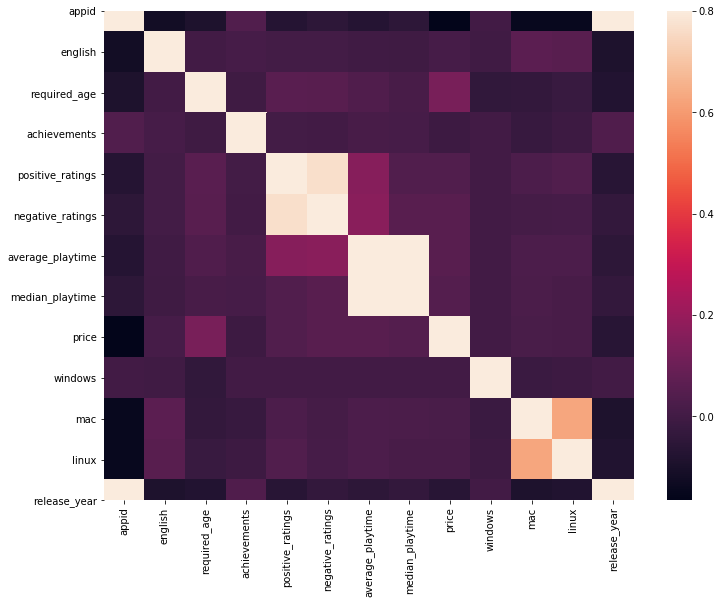

In [6]:
#correlation matrix
corrmat = training_dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

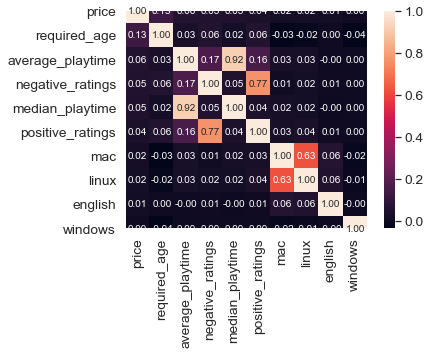

In [7]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(training_dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
corrmat

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,windows,mac,linux,release_year
appid,1.000000,-0.118847,-0.086457,0.041922,-0.069421,-0.051759,-0.070456,-0.051544,-0.165492,0.001148,-0.145692,-0.144860,0.856989
english,-0.118847,1.000000,0.003677,0.014112,0.005807,0.005618,-0.000283,-0.004596,0.011811,-0.001961,0.061062,0.055231,-0.088668
required_age,-0.086457,0.003677,1.000000,-0.005648,0.057705,0.056191,0.034596,0.016512,0.130766,-0.037813,-0.034005,-0.020675,-0.078168
achievements,0.041922,0.014112,-0.005648,1.000000,0.006286,0.003641,0.016224,0.012631,-0.009539,0.001276,-0.023958,-0.009606,0.034574
positive_ratings,-0.069421,0.005807,0.057705,0.006286,1.000000,0.766410,0.162443,0.040059,0.038180,0.000693,0.029873,0.039190,-0.060780
negative_ratings,-0.051759,0.005618,0.056191,0.003641,0.766410,1.000000,0.169256,0.054574,0.054581,0.000605,0.009407,0.015135,-0.033917
average_playtime,-0.070456,-0.000283,0.034596,0.016224,0.162443,0.169256,1.000000,0.921140,0.056543,0.001160,0.029799,0.028051,-0.052279
median_playtime,-0.051544,-0.004596,0.016512,0.012631,0.040059,0.054574,0.921140,1.000000,0.047548,0.000932,0.023800,0.016556,-0.036698
price,-0.165492,0.011811,0.130766,-0.009539,0.038180,0.054581,0.056543,0.047548,1.000000,0.003261,0.021190,0.018280,-0.062743
windows,0.001148,-0.001961,-0.037813,0.001276,0.000693,0.000605,0.001160,0.000932,0.003261,1.000000,-0.015479,-0.007409,0.001917


# Extracting features and label from training dataset and splitting into training and test set

In [63]:
training_dataset.head(5)

,appid,name,english,developer,publisher,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,windows,mac,linux,release_year
0,708830,The Armament Project,1,DysTop,other publisher,0,Single-player;Partial Controller Support,Action;Indie,other steamspy_tags,0,2,2,0,0,0-20000,2.89,1,0,0,2017
1,538000,Hop Step Sing! Kisekiteki Shining! (HQ Edition),1,Kodansha;Polygon Pictures Inc.;Lantis,other publisher,0,Single-player;Partial Controller Support,other genres,other steamspy_tags,0,30,4,0,0,0-20000,3.99,1,0,0,2017
2,603530,A Robot Named Fight!,1,Matt Bitner Games,other publisher,0,other categories,other genres,other steamspy_tags,60,271,30,279,279,20000-50000,10.29,1,1,1,2017
3,564040,ZANGEKI WARP,1,ASTRO PORT,other publisher,0,other categories,Action;Indie,other steamspy_tags,53,16,0,0,0,0-20000,4.79,1,0,1,2017
4,951940,Almost There: The Platformer,1,Bony Yousuf,other publisher,0,other categories,other genres,other steamspy_tags,24,29,1,0,0,0-20000,7.19,1,1,1,2019


In [64]:
#features for model training and evaluation
X=training_dataset.iloc[:,[2,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19]]

In [65]:
#label
Y=training_dataset.iloc[:,15]

In [66]:
Y

0         2.89
1         3.99
2        10.29
3         4.79
4         7.19
         ...  
25039     0.79
25040     0.00
25041     3.99
25042     3.99
25043     4.99
Name: price, Length: 25044, dtype: float64

In [71]:
#features selected
X.head(10)

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,windows,mac,linux,...,Strategy First,Ubisoft,other publisher,Single-player;Partial Controller Support,Single-player;Steam Achievements,Single-player;Steam Achievements;Steam Cloud,Single-player;Steam Achievements;Steam Trading Cards,Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud,Single-player;Steam Trading Cards,other categories
0,1,0,0,2,2,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
1,1,0,0,30,4,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
2,1,0,60,271,30,279,279,1,1,1,...,0,0,1,0,0,0,0,0,0,1
3,1,0,53,16,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,1,0,24,29,1,0,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
5,1,0,87,3,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
6,1,0,13,478,226,96,96,1,0,0,...,0,0,1,0,0,0,0,0,0,1
7,1,0,0,10,9,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
8,1,0,69,43,36,424,424,1,1,1,...,0,0,1,0,0,0,1,0,0,0
9,1,0,24,4,8,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [70]:
#features description
X.columns

Index(['english', 'required_age', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'windows',
       'mac', 'linux', 'release_year', '100000-200000', '20000-50000',
       '200000-500000', '50000-100000', '>=1000000', 'Action;Indie',
       'Adventure;Indie', 'Casual;Indie', 'other genres',
       'Action;Indie;Casual', 'Adventure;Indie;Casual',
       'Early Access;Action;Indie', 'other steamspy_tags', 'Strategy First',
       'Ubisoft', 'other publisher',
       'Single-player;Partial Controller Support',
       'Single-player;Steam Achievements',
       'Single-player;Steam Achievements;Steam Cloud',
       'Single-player;Steam Achievements;Steam Trading Cards',
       'Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud',
       'Single-player;Steam Trading Cards', 'other categories'],
      dtype='object')

In [69]:
#creating new coluumns for categorical features
genre=pd.get_dummies(X['genres'],drop_first=True)
st=pd.get_dummies(X['steamspy_tags'],drop_first=True)
pb=pd.get_dummies(X['publisher'],drop_first=True)
cat=pd.get_dummies(X['categories'],drop_first=True)
owner=pd.get_dummies(X['owners'],drop_first=True)
X=X.drop(['owners','genres','steamspy_tags','publisher','categories'],axis=1)

X=pd.concat([X,owner,genre,st,pb,cat],axis=1)

In [72]:
#splitting of features and label into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [73]:
#features for training model
x_train.describe()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,windows,mac,linux,...,Strategy First,Ubisoft,other publisher,Single-player;Partial Controller Support,Single-player;Steam Achievements,Single-player;Steam Achievements;Steam Cloud,Single-player;Steam Achievements;Steam Trading Cards,Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud,Single-player;Steam Trading Cards,other categories
count,20035.000000,20035.000000,20035.000000,2.003500e+04,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,...,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000,20035.000000
mean,0.981432,0.341702,45.078912,1.003766e+03,216.966359,144.759421,140.893087,0.999800,0.301173,0.195857,...,0.004742,0.003993,0.983229,0.029648,0.087697,0.023459,0.031345,0.024407,0.028800,0.551285
std,0.134995,2.362551,349.077125,2.069325e+04,4790.586815,1874.062381,2251.592567,0.014129,0.458779,0.396869,...,0.068698,0.063066,0.128414,0.169619,0.282860,0.151360,0.174253,0.154314,0.167247,0.497375
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,7.000000,2.500000e+01,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,23.000000,1.240000e+02,41.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,18.000000,5394.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
#features for testing model
x_test.describe()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,windows,mac,linux,...,Strategy First,Ubisoft,other publisher,Single-player;Partial Controller Support,Single-player;Steam Achievements,Single-player;Steam Achievements;Steam Cloud,Single-player;Steam Achievements;Steam Trading Cards,Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud,Single-player;Steam Trading Cards,other categories
count,5009.000000,5009.00000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,...,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000,5009.000000
mean,0.979836,0.41106,46.203633,1007.253743,210.833899,152.888002,133.815931,0.999800,0.288680,0.181873,...,0.005989,0.004392,0.982432,0.028149,0.083649,0.028748,0.028748,0.020363,0.030545,0.546017
std,0.140574,2.58307,358.613394,14167.065519,2668.239090,1359.464430,1442.194751,0.014129,0.453194,0.385778,...,0.077166,0.066134,0.131389,0.165416,0.276889,0.167115,0.167115,0.141254,0.172099,0.497928
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.00000,7.000000,23.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.00000,22.000000,124.000000,41.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,18.00000,5000.000000,863507.000000,142079.000000,44169.000000,71857.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
#changing training label to floating value array
y_train=np.array(y_train,dtype=np.float64)

In [76]:
#changing testing label to floating value array
y_test=np.array(y_test,dtype=np.float64)

In [77]:
y_train

array([ 3.99,  1.99,  3.99, ...,  3.99, 11.99,  0.  ])

In [78]:
y_test

array([ 0.  ,  0.  ,  1.69, ..., 14.99,  0.  ,  7.19])

In [79]:
#function for finding rmse (root mean square error)
from math import *
def rmse(actual,predicted):
    value=0
    for i in range(len(actual)):
        #print(i)
        v=actual[i]-predicted[i]
        #print(v)
        value=value+pow(v,2)
    value=value/len(actual)
    return sqrt(value)

# ==>RANDOM FOREST

In [153]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(criterion='mse',max_depth=20, max_features='log2', n_estimators=800)
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=800)

([<matplotlib.axis.XTick at 0x18e7c7e4148>,
 <a list of 34 Text xticklabel objects>)

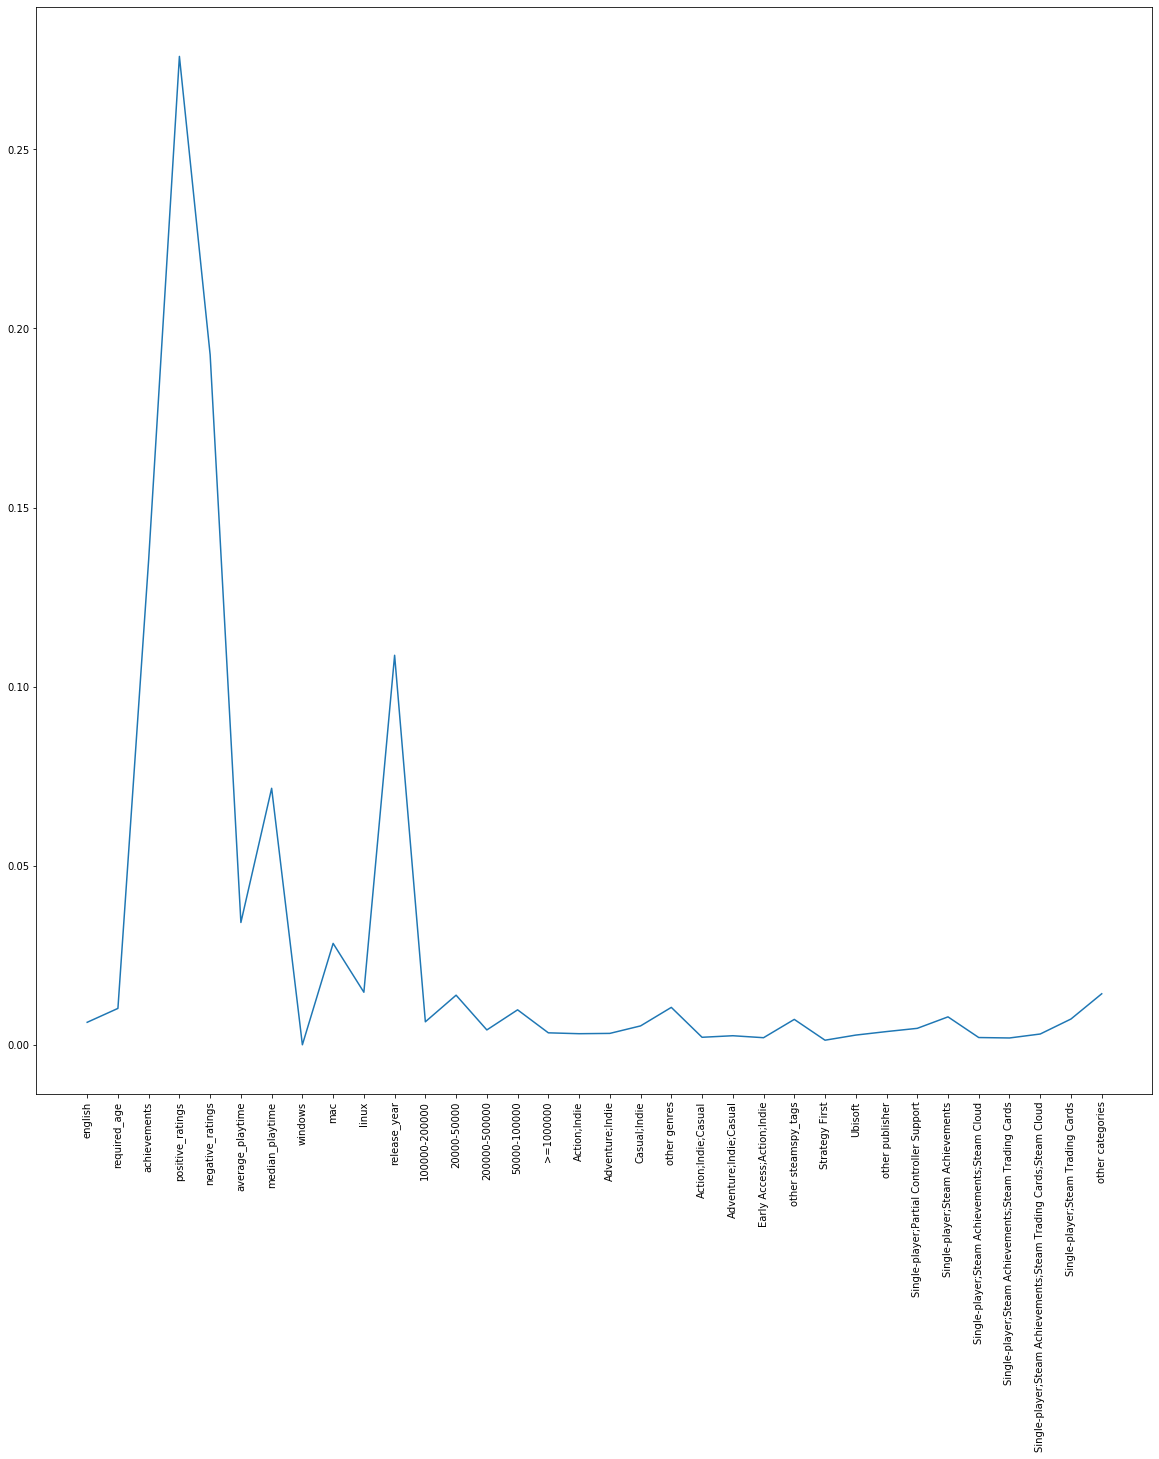

In [82]:
# what features are the most important?
plt.figure(figsize=(20,20))
plt.plot(regressor.feature_importances_)
plt.xticks(np.arange(X.shape[1]), X.columns.tolist(), rotation=90)

In [83]:
# View a list of the features and their importance scores
rf_list=list(zip(X, regressor.feature_importances_)) #windows,owners(10L-20L)(20L-50L)(50L-100L)(100L-200L)(200L-500L)(500L-1000L)(1000L-2000L)

In [86]:
rf_list

[('english', 0.006291218140697066),
 ('required_age', 0.010170974517096245),
 ('achievements', 0.1354532421558181),
 ('positive_ratings', 0.27594559739374713),
 ('negative_ratings', 0.19261978898161616),
 ('average_playtime', 0.0341584834521125),
 ('median_playtime', 0.07162465617100452),
 ('windows', 1.8398429157076408e-05),
 ('mac', 0.02831888670508149),
 ('linux', 0.01468449138554256),
 ('release_year', 0.10875724512337052),
 ('100000-200000', 0.00643621032917912),
 ('20000-50000', 0.013862210006445563),
 ('200000-500000', 0.004160195952552641),
 ('50000-100000', 0.009775663222652128),
 ('>=1000000', 0.003353051696873293),
 ('Action;Indie', 0.00310845162238409),
 ('Adventure;Indie', 0.003193890037763473),
 ('Casual;Indie', 0.005286024788352682),
 ('other genres', 0.010456593910608205),
 ('Action;Indie;Casual', 0.0021103171778027023),
 ('Adventure;Indie;Casual', 0.002541693104238524),
 ('Early Access;Action;Indie', 0.00199160354947359),
 ('other steamspy_tags', 0.007101590618490285),

In [85]:
#selecting features with higher importance 
threshold=0.005
for i in range(len(rf_list)):
    if(rf_list[i][1]>threshold):
        print(rf_list[i])

('english', 0.006291218140697066)
('required_age', 0.010170974517096245)
('achievements', 0.1354532421558181)
('positive_ratings', 0.27594559739374713)
('negative_ratings', 0.19261978898161616)
('average_playtime', 0.0341584834521125)
('median_playtime', 0.07162465617100452)
('mac', 0.02831888670508149)
('linux', 0.01468449138554256)
('release_year', 0.10875724512337052)
('100000-200000', 0.00643621032917912)
('20000-50000', 0.013862210006445563)
('50000-100000', 0.009775663222652128)
('Casual;Indie', 0.005286024788352682)
('other genres', 0.010456593910608205)
('other steamspy_tags', 0.007101590618490285)
('Single-player;Steam Achievements', 0.007808835054003397)
('Single-player;Steam Trading Cards', 0.007210530095004794)
('other categories', 0.014254306252865848)


In [89]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = { 
    'n_estimators': [500,700,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7,8,10,15,20],
    'criterion' :['mse']
}
grid_search = GridSearchCV(estimator = regressor,
                           param_grid=parameters,
                           n_jobs=-1,cv=5,verbose=3)

In [90]:
grid_search = grid_search.fit(X,Y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 14.6min finished


In [91]:
#best accuracy in grid search cv
best_accuracy

0.2723459152186042

In [92]:
#best parameters in grid search cv
best_parameters

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 800}

In [93]:
#best estimator in grid search cv
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=800)

In [156]:
#predicting test set result
Y_pred_rf=regressor.predict(x_test)

In [157]:
#calculating rmse on test set label
rmse(y_test,Y_pred_rf)  

5.4733128915542295

# ==>XGBOOST

In [118]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [119]:
## Hyper Parameter Optimization for xgboost model

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20 ] ,
 "max_depth"        : [ 6, 8, 10, 12, 15],
 "min_child_weight" : [ 3, 5, 7 ],
 "gamma"            : [ 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.5 , 0.7 ],
    "n_estimators":[500,700]
    
}

In [142]:
#applying xgboost model
regressor=xgboost.XGBRegressor(colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6,
             min_child_weight=3, n_estimators=500)
regressor.fit(x_train,y_train)

[17:44:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6,
             min_child_weight=3, n_estimators=500)

In [124]:
#applying randomised search cv/Grid Search CV
from sklearn.model_selection import GridSearchCV
random_search=RandomizedSearchCV(regressor,param_distributions=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,verbose=3)

In [125]:
random_search.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


[17:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'gamma': [0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [6, 8, 10, 12, 15],
                                        'min_child_weight': [3, 5, 7],
                                        'n_estimators': [500, 700]},
                   scoring='neg_mean_squared_error', verbose=3)

In [126]:
#getting best estimator for xgboost model using randomised search cv or grid search cv
random_search.best_estimator_

XGBRegressor(colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6,
             min_child_weight=3, n_estimators=500)

In [127]:
#best neg mse score
random_search.best_score_

-38.53450603565485

In [146]:
#predicting test set result

Y_pred_xgboost=regressor.predict(x_test)

In [148]:
#calculating rmse for test set label
rmse(y_test,Y_pred_xgboost) 

5.418223478939161

# SUBMISSION OF TEST DATA

In [40]:
#importing testing dataset
testing_dataset=pd.read_csv('steam_test.csv')

In [41]:
testing_dataset.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners
0,514520,Sparky's Hunt,2016-08-18,1,Luke Cripps,Fellowplayer,windows,0,Single-player,Indie,Indie;Horror,14,6,3,0,0,0-20000
1,1012710,Endzeit,2019-04-03,1,RockyDev,RockyDev,windows,0,Single-player;Multi-player;Co-op;Full controll...,Action;Early Access,Early Access;Action;Violent,0,0,1,88,88,0-20000
2,279260,Richard & Alice,2014-06-05,1,Owl Cave,Owl Cave,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,Adventure;Indie;Point & Click,21,264,99,332,332,50000-100000
3,220090,The Journey Down: Chapter One,2013-01-09,1,SkyGoblin,SkyGoblin,windows;mac;linux,0,Single-player;Steam Trading Cards,Adventure;Indie,Adventure;Point & Click;Indie,0,902,129,303,327,200000-500000
4,788870,In The Long Run The Game,2018-07-02,1,Zerstoren Games,Zerstoren Games,windows,0,Single-player;Partial Controller Support,Action;Adventure;Indie;Simulation;Strategy;Ear...,Early Access;Simulation;Indie,0,6,11,0,0,0-20000
5,920780,Safe,2018-11-02,1,GraphXGames,GraphXGames,windows,0,Single-player,Indie;Strategy,Indie;Strategy;Puzzle,0,1,0,0,0,0-20000
6,625780,Magic Wand,2017-06-25,1,thecatamites,harmony corp,windows;mac;linux,0,Single-player,Adventure;Indie;RPG,Adventure;Indie;RPG,0,34,2,0,0,0-20000
7,339440,Critical Annihilation,2016-02-12,1,Devoga,Devoga,windows;mac;linux,0,Single-player;Co-op;Shared/Split Screen;Steam ...,Action;Indie;Early Access,Early Access;Action;Indie,24,178,16,0,0,0-20000
8,448240,Hybrid Animals,2016-08-29,1,FamishedMammal,Abstract Software Inc.,windows,0,Single-player;Multi-player;Steam Achievements;...,Action;Casual;Indie;Simulation,Simulation;Action;Casual,26,196,134,0,0,20000-50000
9,838110,HyperParasite,2019-04-03,1,Troglobytes Games,Troglobytes Games;Hound Picked Games,windows,0,Single-player;Local Co-op;Shared/Split Screen;...,Action;Adventure;Indie;Early Access,Early Access;Action;Indie,55,30,1,0,0,0-20000


In [42]:
#creating new features - windows,mac,linux from platforms feature
windows_t=[]
mac_t=[]
linux_t=[]
platforms_t=['windows','mac','linux']
for i in range(testing_dataset.shape[0]):
    name=testing_dataset['platforms'][i]
    print(name)
    arr=name.split(';')
    a=[]
    for p in platforms_t:
        if p in arr:
            a.append(1)
        else:
            a.append(0)
    windows_t.append(a[0])
    mac_t.append(a[1])
    linux_t.append(a[2])

windows
windows
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows
windows;linux
windows
windows;linux
windows
windows
windows;mac;linux
windows
windows;mac
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows;mac
windows
windows
windows
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows
windows
windows
windows
wind

windows;mac;linux
windows;mac;linux
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows;mac
windows;mac
windows
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac
windows
windows
windows;mac;linux
windows
windows;mac;linux
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows
windows
windows
windows;mac;linux
windows;mac;linux
windows;linux
windows
windows
windows;mac;linux
windows;mac;linux
windows
windows
windows;mac;linux
windows
windows
windows
windows;mac;linux
windows;linux
windows;linux
windows
windows
windows
windows
windows
windows;mac
windows
windows
windows
windows;linux
windows
windows;mac
windows;mac
windows
windows
windows
windows
windows
windows;mac
windows;mac;linux
windows;mac;linux
windows
windows;linux
windows
windows
windows
windows
windows;mac;linux
windows
windows
windows
windows
windows;mac;linux
windows;mac
windows
windows
windows;mac;linux
windows
windows;mac
windows;

In [43]:
testing_dataset['windows']=windows_t
testing_dataset['mac']=mac_t
testing_dataset['linux']=linux_t

In [44]:
#creating new feature release_year from release _date
year_t=[]
for i in range(testing_dataset.shape[0]):
    arr=testing_dataset['release_date'][i].split('-')
    year_t.append(int(arr[0]))
print(year_t)
testing_dataset['release_year']=year_t

[2016, 2019, 2014, 2013, 2018, 2018, 2017, 2016, 2016, 2019, 2016, 2018, 2018, 2019, 2018, 2018, 2017, 2018, 2017, 2016, 2018, 2017, 2019, 2017, 2017, 2019, 2016, 2018, 2017, 2017, 2018, 2019, 2015, 2015, 2018, 2014, 2018, 2018, 2014, 2018, 2014, 2015, 2018, 2018, 2018, 2017, 2016, 2018, 2018, 2016, 2016, 2019, 2018, 2019, 2018, 2016, 2015, 2018, 2018, 2017, 2019, 2017, 2018, 2018, 2016, 2016, 2018, 2018, 2018, 2018, 2014, 2018, 2017, 2017, 2017, 2014, 2015, 2016, 2016, 2018, 2018, 2015, 2016, 2009, 2014, 2017, 2018, 2015, 2017, 2017, 2017, 2018, 2016, 2018, 2018, 2014, 2018, 2018, 2018, 2016, 2017, 2016, 2018, 2018, 2018, 2016, 2017, 2019, 2018, 2008, 2017, 2019, 2016, 2016, 2019, 2018, 2017, 2019, 2017, 2017, 2016, 2014, 2012, 2016, 2018, 2018, 2017, 2017, 2013, 2016, 2017, 2019, 2018, 2014, 2018, 2018, 2015, 2018, 2015, 2017, 2015, 2013, 2019, 2014, 2008, 2013, 2016, 2016, 2017, 2016, 2017, 2017, 2016, 2016, 2018, 2016, 2019, 2015, 2016, 2017, 2016, 2017, 2018, 2018, 2017, 2016, 201

In [45]:
testing_dataset.categories.value_counts().head(10)
#training set description for categories feature
# Single-player                                                        5646
# Single-player;Steam Achievements                                     2176
# Single-player;Steam Achievements;Steam Trading Cards                  772
# Single-player;Partial Controller Support                              735
# Single-player;Steam Trading Cards                                     730
# Single-player;Steam Achievements;Steam Cloud                          614
# Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud      591

Single-player                                                                               464
Single-player;Steam Achievements                                                            158
Single-player;Steam Achievements;Steam Trading Cards                                         76
Single-player;Partial Controller Support                                                     69
Single-player;Steam Trading Cards                                                            62
Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud                             61
Single-player;Full controller support                                                        50
Single-player;Steam Achievements;Full controller support                                     41
Single-player;Steam Achievements;Full controller support;Steam Trading Cards;Steam Cloud     41
Single-player;Steam Achievements;Steam Cloud                                                 39
Name: categories, dtype: int64

In [46]:
categories_test=['Single-player','Single-player;Steam Achievements','Single-player;Steam Achievements;Steam Trading Cards','Single-player;Partial Controller Support','Single-player;Steam Trading Cards','Single-player;Steam Achievements;Steam Cloud','Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud']
for i in range(testing_dataset.shape[0]):
    name=testing_dataset['categories'][i]
    if name not in categories_test:
        testing_dataset['categories'][i]='other categories'

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
testing_dataset.categories.value_counts()

other categories                                                    1102
Single-player                                                        464
Single-player;Steam Achievements                                     158
Single-player;Steam Achievements;Steam Trading Cards                  76
Single-player;Partial Controller Support                              69
Single-player;Steam Trading Cards                                     62
Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud      61
Single-player;Steam Achievements;Steam Cloud                          39
Name: categories, dtype: int64

In [48]:
testing_dataset.genres.value_counts().head(10) 
#training set description for genres feature
# other genres              19763
# Action;Indie               1695
# Casual;Indie               1386
# Action;Adventure;Indie     1132
# Adventure;Indie            1068

Action;Indie              157
Adventure;Indie           102
Action;Adventure;Indie     97
Action;Casual;Indie        96
Casual;Indie               96
Adventure;Casual;Indie     62
Action                     61
Indie                      48
Adventure;Casual           44
Casual                     41
Name: genres, dtype: int64

In [49]:
genres_test=['Action;Indie','Casual;Indie','Action;Adventure;Indie','Adventure;Indie']
for i in range(testing_dataset.shape[0]):
    name=testing_dataset['genres'][i]
    if name not in genres_test:
        testing_dataset['genres'][i]='other genres'

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [50]:
testing_dataset.genres.value_counts()

other genres              1579
Action;Indie               157
Adventure;Indie            102
Action;Adventure;Indie      97
Casual;Indie                96
Name: genres, dtype: int64

In [51]:
testing_dataset.steamspy_tags.value_counts().head()

Action;Indie;Casual          81
Action;Adventure;Indie       64
Action;Indie;Adventure       34
Early Access;Action;Indie    34
Adventure;Indie;Casual       28
Name: steamspy_tags, dtype: int64

In [52]:
steamspy_tags_test=['Action;Adventure;Indie','Early Access;Action;Indie','Action;Indie;Casual','Adventure;Indie;Casual']
for i in range(testing_dataset.shape[0]):
    name=testing_dataset['steamspy_tags'][i]
    if name not in steamspy_tags_test:
        testing_dataset['steamspy_tags'][i]='other steamspy_tags'

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [53]:
testing_dataset.steamspy_tags.value_counts()

other steamspy_tags          1824
Action;Indie;Casual            81
Action;Adventure;Indie         64
Early Access;Action;Indie      34
Adventure;Indie;Casual         28
Name: steamspy_tags, dtype: int64

In [54]:
testing_dataset.publisher.value_counts().head()

Big Fish Games                15
Strategy First                11
Ubisoft                        9
Artifex Mundi                  9
BANDAI NAMCO Entertainment     9
Name: publisher, dtype: int64

In [55]:
publisher_test=['Big Fish Games','Strategy First','Ubisoft']
for i in range(testing_dataset.shape[0]):
    name=testing_dataset['publisher'][i]
    if name not in publisher_test:
        testing_dataset['publisher'][i]='other publisher'

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
testing_dataset.publisher.value_counts()

other publisher    1996
Big Fish Games       15
Strategy First       11
Ubisoft               9
Name: publisher, dtype: int64

In [57]:
value=1000000
for i in range(testing_dataset.shape[0]):
    name=testing_dataset['owners'][i]
    arr=name.split('-')
    val1=int(arr[0])
    val2=int(arr[1])
    if(val1>=value or val2>=value):
        testing_dataset['owners'][i]='>=1000000'

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
#changed testing dataset
testing_dataset

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,windows,mac,linux,release_year
0,514520,Sparky's Hunt,2016-08-18,1,Luke Cripps,other publisher,windows,0,Single-player,other genres,...,14,6,3,0,0,0-20000,1,0,0,2016
1,1012710,Endzeit,2019-04-03,1,RockyDev,other publisher,windows,0,other categories,other genres,...,0,0,1,88,88,0-20000,1,0,0,2019
2,279260,Richard & Alice,2014-06-05,1,Owl Cave,other publisher,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,...,21,264,99,332,332,50000-100000,1,0,0,2014
3,220090,The Journey Down: Chapter One,2013-01-09,1,SkyGoblin,other publisher,windows;mac;linux,0,Single-player;Steam Trading Cards,Adventure;Indie,...,0,902,129,303,327,200000-500000,1,1,1,2013
4,788870,In The Long Run The Game,2018-07-02,1,Zerstoren Games,other publisher,windows,0,Single-player;Partial Controller Support,other genres,...,0,6,11,0,0,0-20000,1,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,9940,Blade Kitten,2014-05-22,1,Krome Studios,other publisher,windows,0,other categories,other genres,...,20,746,149,222,360,50000-100000,1,0,0,2014
2027,983880,Arctic Fleet,2019-03-29,1,Coffee-Powered Games,other publisher,windows;mac,0,Single-player;Steam Achievements,other genres,...,15,7,8,0,0,0-20000,1,1,0,2019
2028,687760,Occultus - Mediterranean Cabal,2017-11-01,1,Sylphe Labs,other publisher,windows;mac,0,Single-player,other genres,...,0,4,6,0,0,0-20000,1,1,0,2017
2029,391290,DeathCrank,2016-12-14,1,Kenny Roy,other publisher,windows,0,other categories,other genres,...,0,5,2,0,0,0-20000,1,0,0,2016


In [59]:
#columns in new testing dataset
testing_dataset.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'windows', 'mac',
       'linux', 'release_year'],
      dtype='object')

In [61]:
#saving new testing dataset for further usage
testing_dataset.to_csv('Testing.csv',header=True,index=False)

In [101]:
#importing new testing dataset
testing_dataset=pd.read_csv('Testing.csv')

In [102]:
testing_dataset

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,windows,mac,linux,release_year
0,514520,Sparky's Hunt,2016-08-18,1,Luke Cripps,other publisher,windows,0,Single-player,other genres,...,14,6,3,0,0,0-20000,1,0,0,2016
1,1012710,Endzeit,2019-04-03,1,RockyDev,other publisher,windows,0,other categories,other genres,...,0,0,1,88,88,0-20000,1,0,0,2019
2,279260,Richard & Alice,2014-06-05,1,Owl Cave,other publisher,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,...,21,264,99,332,332,50000-100000,1,0,0,2014
3,220090,The Journey Down: Chapter One,2013-01-09,1,SkyGoblin,other publisher,windows;mac;linux,0,Single-player;Steam Trading Cards,Adventure;Indie,...,0,902,129,303,327,200000-500000,1,1,1,2013
4,788870,In The Long Run The Game,2018-07-02,1,Zerstoren Games,other publisher,windows,0,Single-player;Partial Controller Support,other genres,...,0,6,11,0,0,0-20000,1,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,9940,Blade Kitten,2014-05-22,1,Krome Studios,other publisher,windows,0,other categories,other genres,...,20,746,149,222,360,50000-100000,1,0,0,2014
2027,983880,Arctic Fleet,2019-03-29,1,Coffee-Powered Games,other publisher,windows;mac,0,Single-player;Steam Achievements,other genres,...,15,7,8,0,0,0-20000,1,1,0,2019
2028,687760,Occultus - Mediterranean Cabal,2017-11-01,1,Sylphe Labs,other publisher,windows;mac,0,Single-player,other genres,...,0,4,6,0,0,0-20000,1,1,0,2017
2029,391290,DeathCrank,2016-12-14,1,Kenny Roy,other publisher,windows,0,other categories,other genres,...,0,5,2,0,0,0-20000,1,0,0,2016


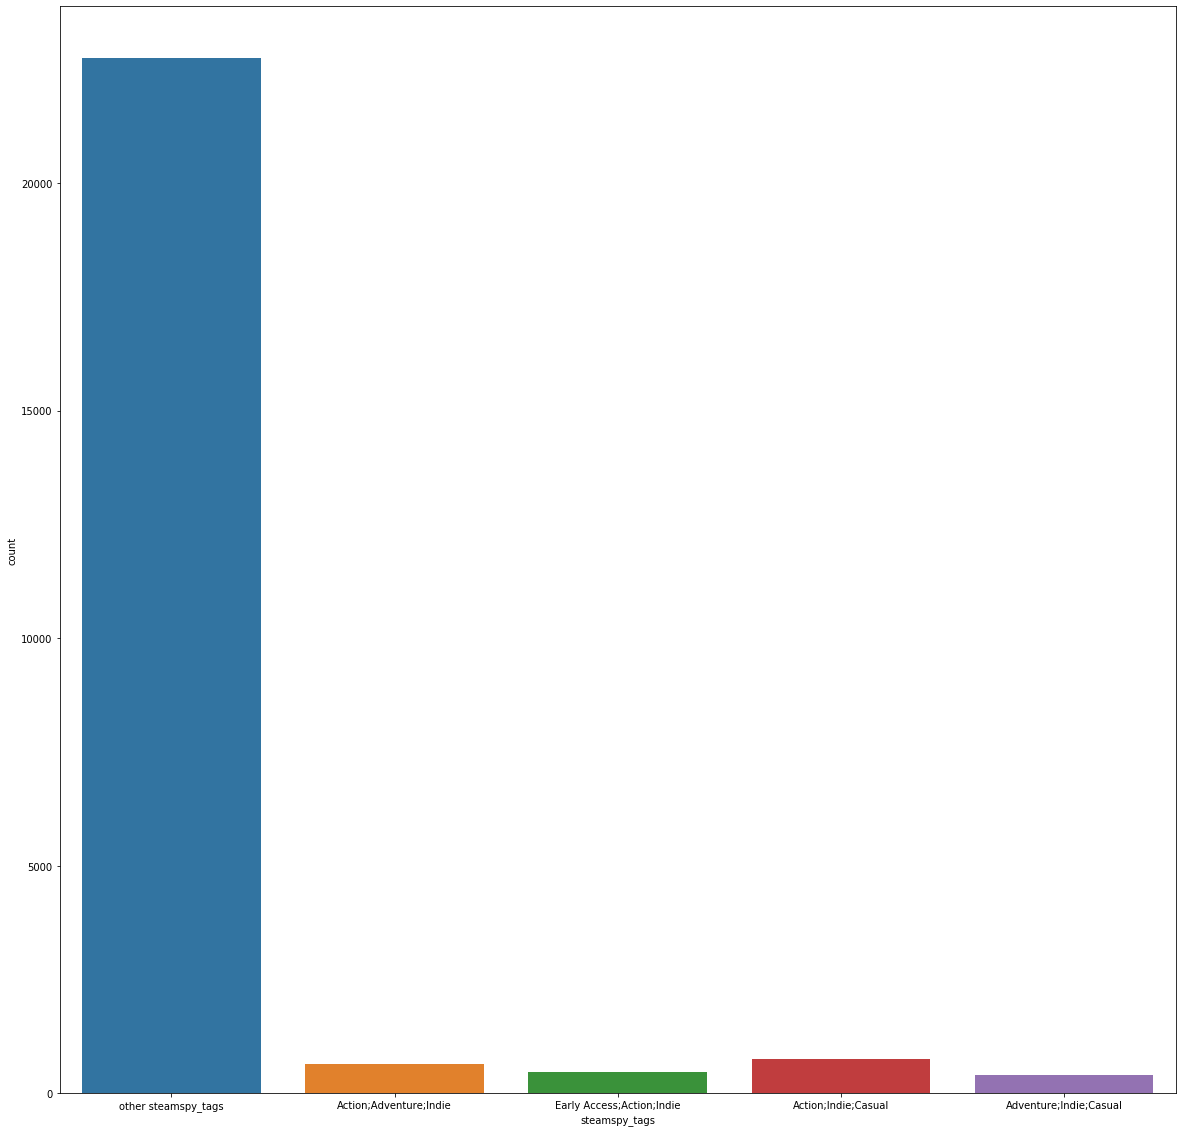

In [103]:
#plotting categorical feature-steamspy_tags
plt.figure(figsize=(20,20))
sns.countplot(x='steamspy_tags',data=testing_dataset)

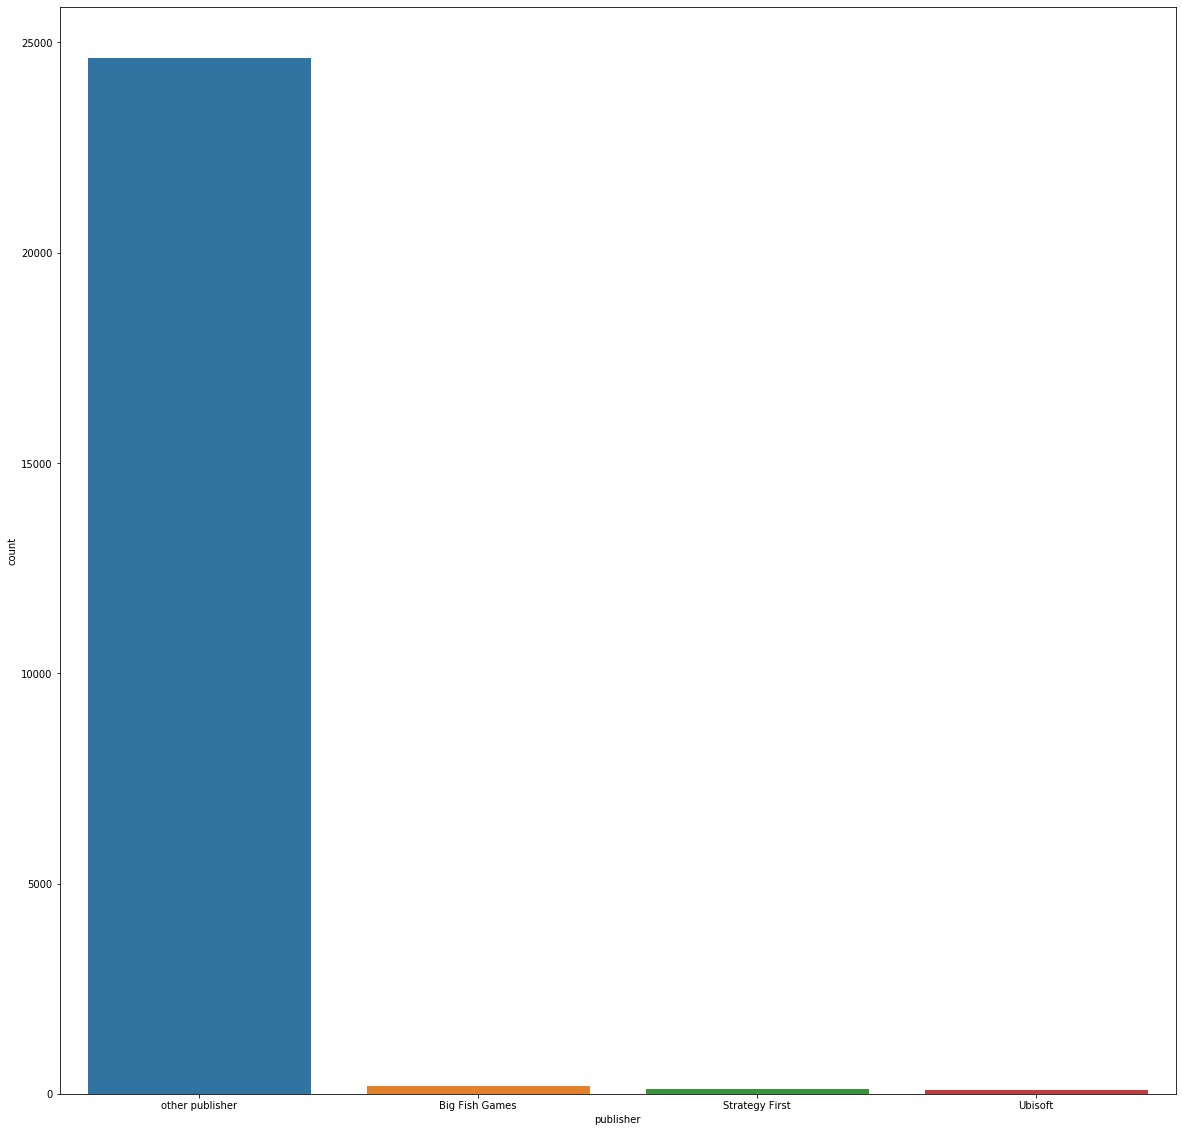

In [104]:
#plotting categorical feature-publisher
plt.figure(figsize=(20,20))
sns.countplot(x='publisher',data=testing_dataset)

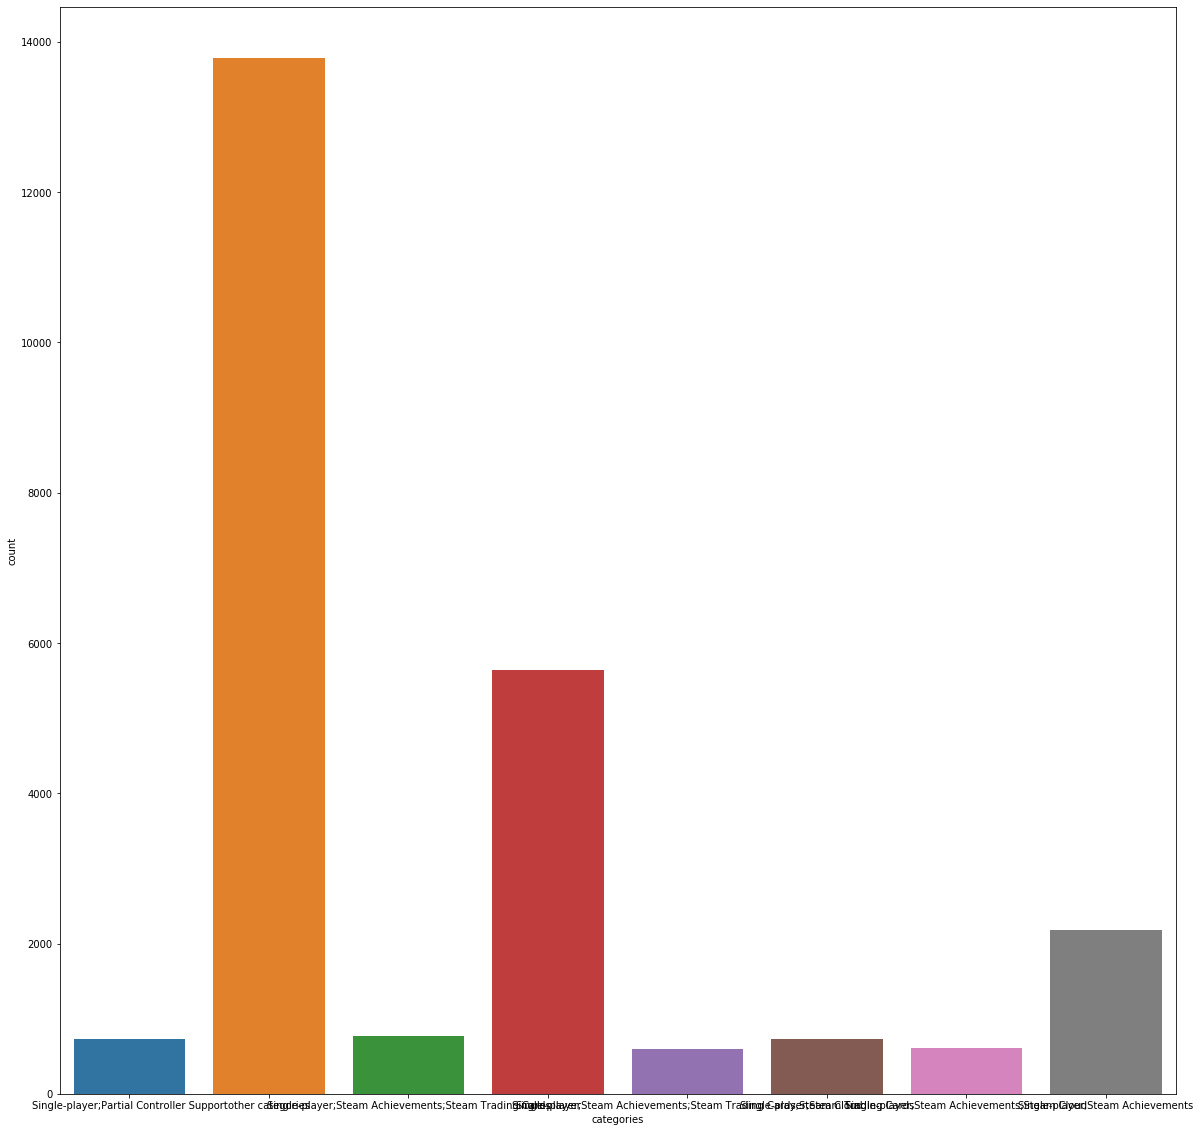

In [105]:
#plotting categorical feature-categories
plt.figure(figsize=(20,20))
sns.countplot(x='categories',data=testing_dataset)

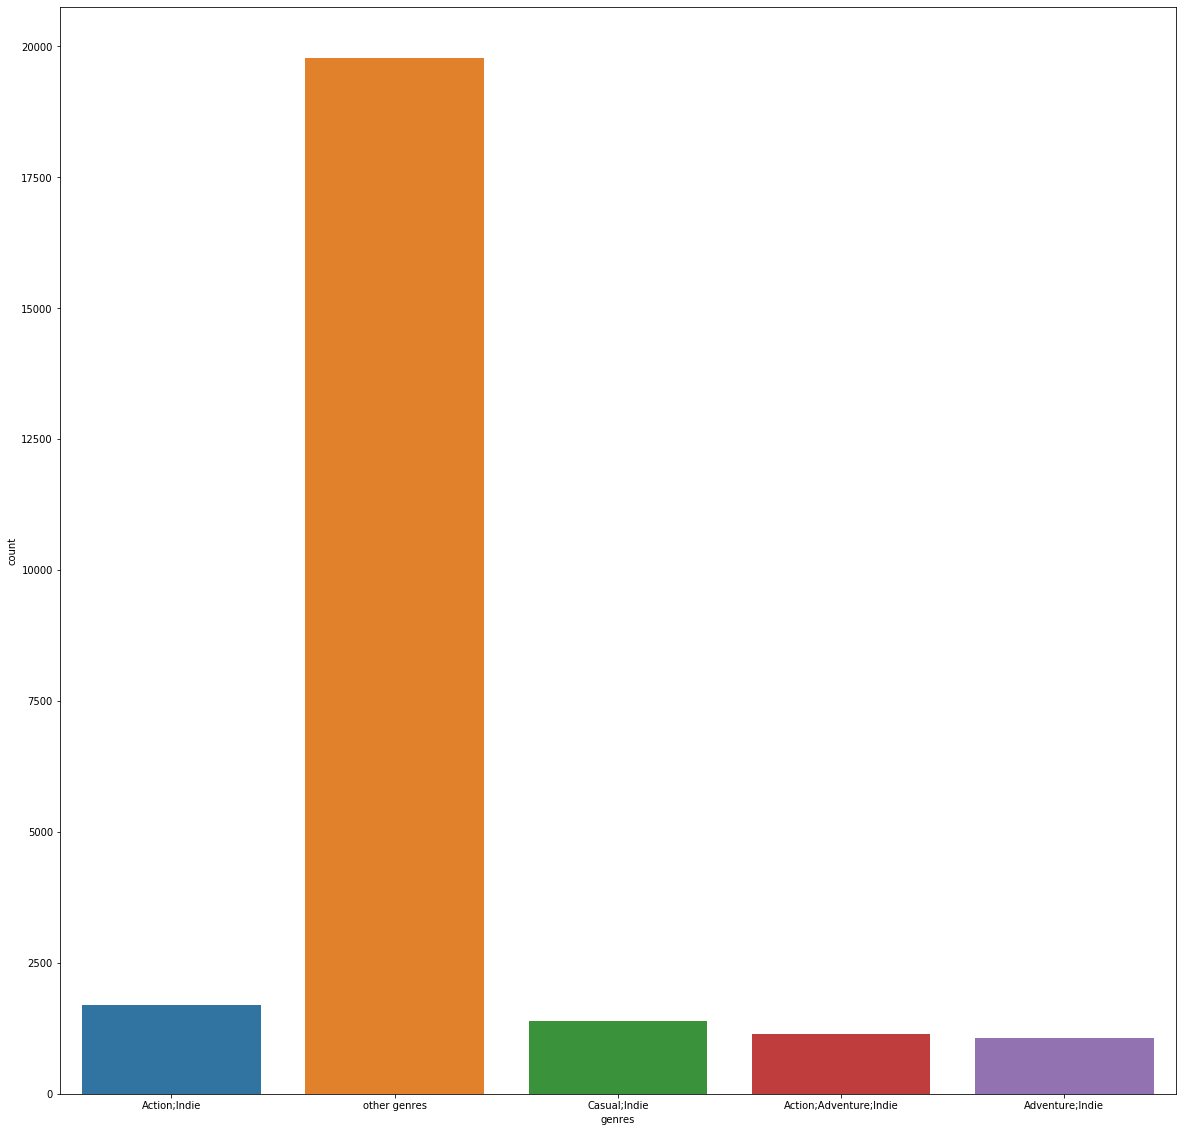

In [106]:
#plotting categorical feature-genres
plt.figure(figsize=(20,20))
sns.countplot(x='genres',data=testing_dataset)

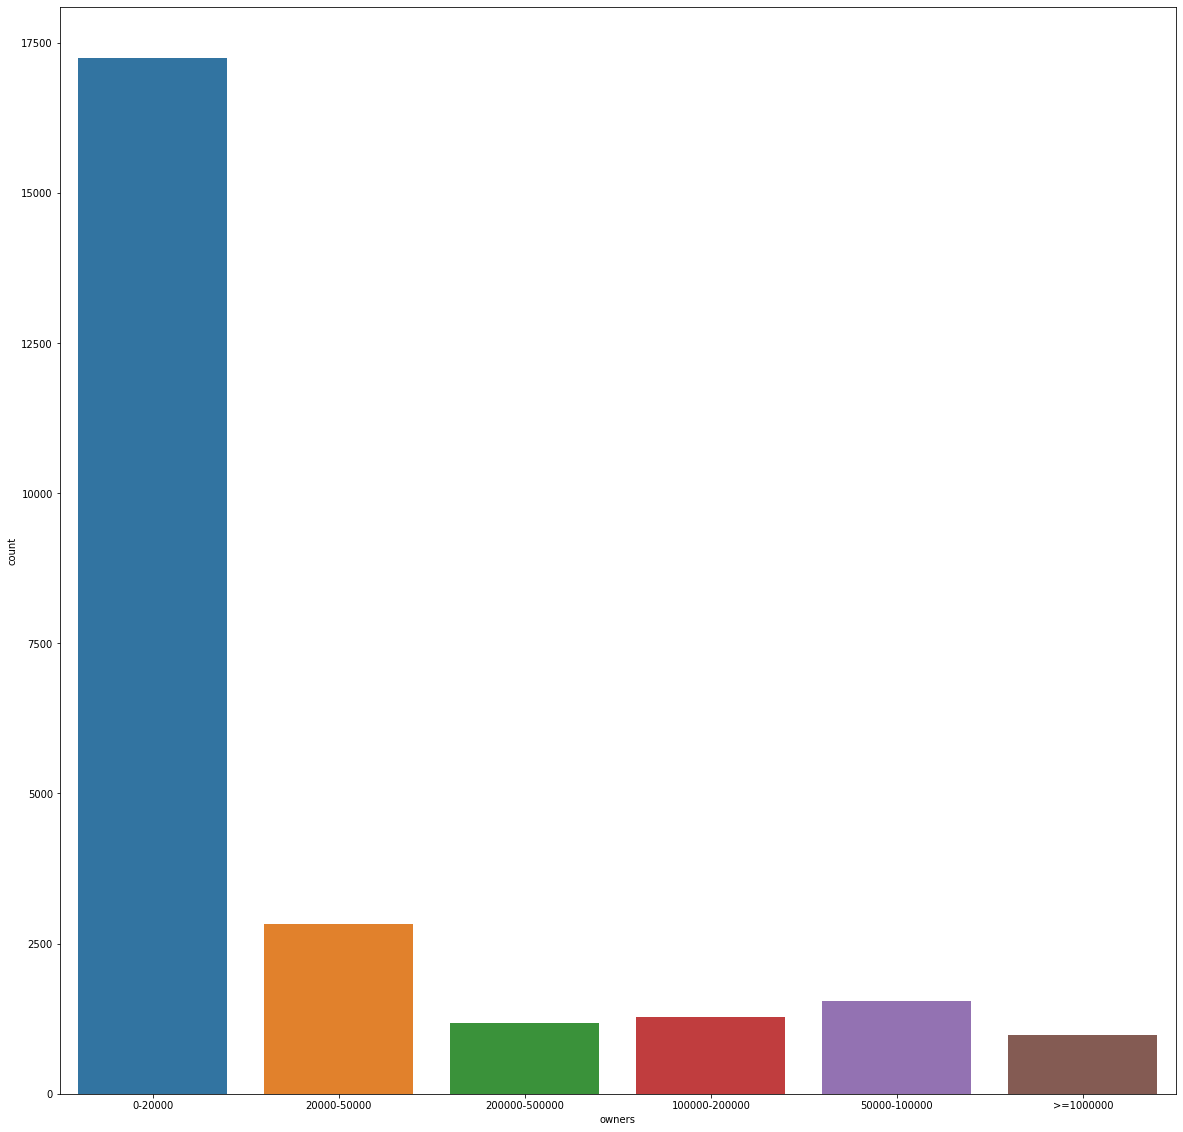

In [107]:
#plotting categorical feature-owners
plt.figure(figsize=(20,20))
sns.countplot(x='owners',data=testing_dataset)

In [108]:
testing_dataset.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'windows', 'mac',
       'linux', 'release_year'],
      dtype='object')

In [110]:
#extracting feature on which model needs to predict
X_test=testing_dataset.iloc[:,[3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [111]:
#extracted features
X_test

,english,publisher,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,windows,mac,linux,release_year
0,1,other publisher,0,Single-player,other genres,other steamspy_tags,14,6,3,0,0,0-20000,1,0,0,2016
1,1,other publisher,0,other categories,other genres,other steamspy_tags,0,0,1,88,88,0-20000,1,0,0,2019
2,1,other publisher,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie,other steamspy_tags,21,264,99,332,332,50000-100000,1,0,0,2014
3,1,other publisher,0,Single-player;Steam Trading Cards,Adventure;Indie,other steamspy_tags,0,902,129,303,327,200000-500000,1,1,1,2013
4,1,other publisher,0,Single-player;Partial Controller Support,other genres,other steamspy_tags,0,6,11,0,0,0-20000,1,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,1,other publisher,0,other categories,other genres,other steamspy_tags,20,746,149,222,360,50000-100000,1,0,0,2014
2027,1,other publisher,0,Single-player;Steam Achievements,other genres,other steamspy_tags,15,7,8,0,0,0-20000,1,1,0,2019
2028,1,other publisher,0,Single-player,other genres,other steamspy_tags,0,4,6,0,0,0-20000,1,1,0,2017
2029,1,other publisher,0,other categories,other genres,other steamspy_tags,0,5,2,0,0,0-20000,1,0,0,2016


In [112]:
#creating new coluumns for categorical features
genre_t=pd.get_dummies(X_test['genres'],drop_first=True)
st_t=pd.get_dummies(X_test['steamspy_tags'],drop_first=True)
pb_t=pd.get_dummies(X_test['publisher'],drop_first=True)
cat_t=pd.get_dummies(X_test['categories'],drop_first=True)
owner_t=pd.get_dummies(X_test['owners'],drop_first=True)
X_test=X_test.drop(['owners','genres','steamspy_tags','publisher','categories'],axis=1)

X_test=pd.concat([X_test,owner_t,genre_t,st_t,pb_t,cat_t],axis=1)

In [113]:
#features
X_test.columns

Index(['english', 'required_age', 'achievements', 'positive_ratings',
       'negative_ratings', 'average_playtime', 'median_playtime', 'windows',
       'mac', 'linux', 'release_year', '100000-200000', '20000-50000',
       '200000-500000', '50000-100000', '>=1000000', 'Action;Indie',
       'Adventure;Indie', 'Casual;Indie', 'other genres',
       'Action;Indie;Casual', 'Adventure;Indie;Casual',
       'Early Access;Action;Indie', 'other steamspy_tags', 'Strategy First',
       'Ubisoft', 'other publisher',
       'Single-player;Partial Controller Support',
       'Single-player;Steam Achievements',
       'Single-player;Steam Achievements;Steam Cloud',
       'Single-player;Steam Achievements;Steam Trading Cards',
       'Single-player;Steam Achievements;Steam Trading Cards;Steam Cloud',
       'Single-player;Steam Trading Cards', 'other categories'],
      dtype='object')

In [158]:
#model which predict
regressor

RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=800)

In [159]:
#predicting testing dataset result
Y_pred_test=regressor.predict(X_test)

In [160]:
#predicted results
Y_pred_test

array([ 4.88694843,  6.53002543,  6.27515981, ..., 13.79610091,
        5.54309485,  4.81757978])

In [161]:
#Making submission
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'appid':pd.read_csv('steam_test.csv').appid,'price':prediction})
  my_submission.to_csv('{}'.format(sub_name),index=False)
  print('A submission file has been made')

make_submission(Y_pred_test[:],'submission_rf_4_x.csv')

A submission file has been made
